In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
from botorch.utils.sampling import draw_sobol_samples
from botorch.test_functions import Ackley

# Define the 2D Ackley function
ackley_function = Ackley(dim=2).to(dtype=torch.float64)

# Define the objective function
def objective(X):
    return ackley_function(2*X-1).unsqueeze(-1)

In [5]:
# Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Set default tensor type to float64
torch.set_default_dtype(torch.float64)

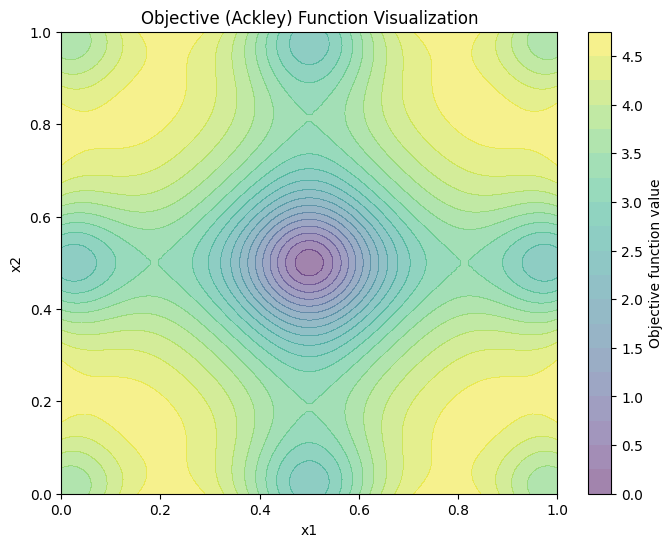

In [4]:
# Create a grid for plotting in the scaled domain
x1, x2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = torch.tensor(np.stack([x1, x2], axis=-1), dtype=torch.float64)

# Evaluate the Ackley function on the grid
# Note: The input to the Ackley function is scaled back to its original domain
z = objective(grid.view(-1, 2)).view(100, 100).detach().numpy()

# Plot the Ackley function
plt.figure(figsize=(8, 6))
contour = plt.contourf(x1, x2, z, levels=20, alpha=0.5, cmap="viridis")
plt.colorbar(contour, label='Objective function value')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Objective (Ackley) Function Visualization")
plt.show()

In [6]:
# Define your cost function
def cost_function(X):
    # Reshape X to ensure each row is a 2D point
    X = X.view(-1, 2)  # Reshape to [number_of_points, 2]
    distance_squared = torch.sum((2*X-1)**2, dim=-1)
    return 1 / (1 + distance_squared).squeeze()

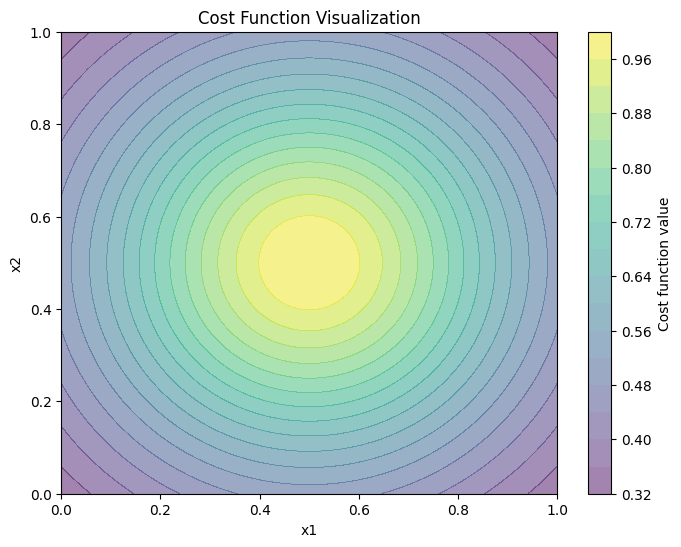

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Create a grid for plotting in the scaled domain
x1, x2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = torch.tensor(np.stack([x1, x2], axis=-1), dtype=torch.float64)

# Evaluate the cost function on the grid
z = cost_function(grid.view(-1, 2)).view(100, 100).numpy()

# Plot the cost function
plt.figure(figsize=(8, 6))
contour = plt.contourf(x1, x2, z, levels=20, alpha=0.5, cmap="viridis")
plt.colorbar(contour, label='Cost function value')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Cost Function Visualization")
plt.show()

In [1]:
from PandoraBayesOPT.bayesianoptimizer import BayesianOptimizer

In [52]:
# Create an instance of BayesianOptimizer
EI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=42, cost=cost_function)

# Run the optimization
EI_optimizer.run(num_iterations=40, acquisition_function_class=ExpectedImprovement)

EI_best_history = EI_optimizer.get_best_history()

# Retrieve the cumulative cost
EI_cost_history = EI_optimizer.get_cost_history()
print("Total cumulative cost:", EI_cumulative_cost)

Iteration 0, New point: [0.40094544 0.        ], New value: 3.468391044204371
Best observed value: 2.7448294453063906
Cumulative cost: 0.49037703116533315

Iteration 1, New point: [0.58357935 0.2146648 ], New value: 3.515023100485753
Best observed value: 2.7448294453063906
Cumulative cost: 1.229144042641539

Iteration 2, New point: [0.57976868 0.        ], New value: 3.228928304869346
Best observed value: 2.7448294453063906
Cumulative cost: 1.7228609597422078

Iteration 3, New point: [0.5295124  0.09064262], New value: 2.945780118690547
Best observed value: 2.7448294453063906
Cumulative cost: 2.3203118319208214

Iteration 4, New point: [0.59153385 0.05801677], New value: 3.3345652641114545
Best observed value: 2.7448294453063906
Cumulative cost: 2.8713031939987728

Iteration 5, New point: [0.51105891 0.00410276], New value: 2.6328459843301393
Best observed value: 2.6328459843301393
Cumulative cost: 3.375298492152265

Iteration 6, New point: [0.50289826 0.02907069], New value: 2.5833205

Text(0.5, 1.0, 'Performance of EI policy')

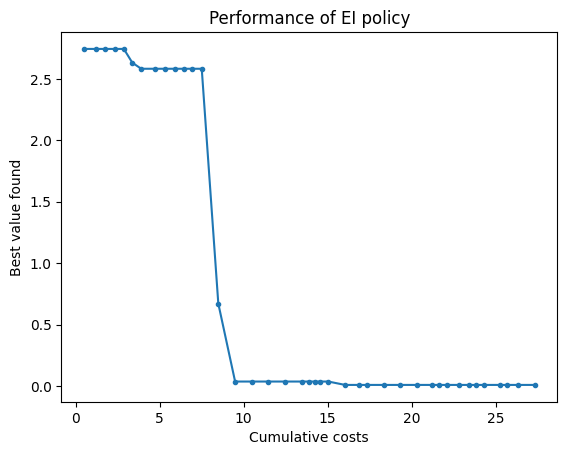

In [56]:
plt.plot(EI_cost_history, EI_best_history,'.-')
plt.xlabel('Cumulative costs')
plt.ylabel('Best value found')
plt.title("Performance of EI policy")

In [16]:
# Example usage with GittinsIndex
GI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=42)
GI_optimizer.run(num_iterations=24, acquisition_function_class=GittinsIndex, lmbda=0.005)
GI_best_value = optimizer.get_best_value()
GI_best_history = optimizer.get_best_history()

Iteration 0, New point: [0.30614495 0.        ], New value: 4.406207636591692
Best observed value: 2.7448294453063906

Iteration 1, New point: [0.60102425 0.3765775 ], New value: 2.4289779756493
Best observed value: 2.4289779756493

Iteration 2, New point: [0.67195574 0.        ], New value: 4.248078190458699
Best observed value: 2.4289779756493

Iteration 3, New point: [0.49776187 0.36481925], New value: 1.9221231316176994
Best observed value: 1.9221231316176994

Iteration 4, New point: [0.70663933 0.91617566], New value: 4.346311298540638
Best observed value: 1.9221231316176994

Iteration 5, New point: [0.41767396 0.40747561], New value: 1.8323120871873297
Best observed value: 1.8323120871873297

Iteration 6, New point: [0.43184689 0.26750252], New value: 3.191109947446272
Best observed value: 1.8323120871873297

Iteration 7, New point: [0.50489835 0.49955232], New value: 0.030399737983419772
Best observed value: 0.030399737983419772

Iteration 8, New point: [0.57747733 0.57061852], 

Text(0.5, 1.0, 'Performance of Gittins policy')

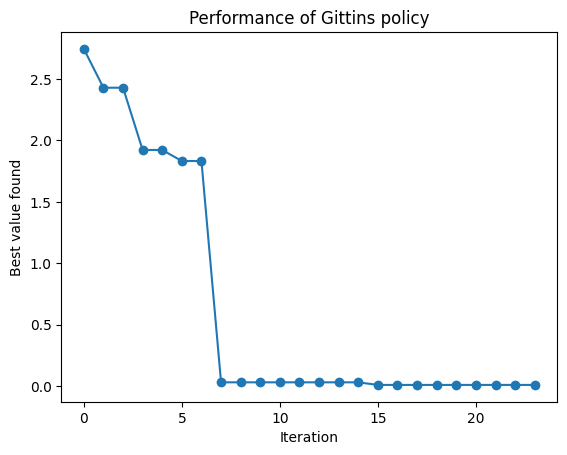

In [17]:
plt.plot(GI_best_history,'o-')
plt.xlabel('Iteration')
plt.ylabel('Best value found')
plt.title("Performance of Gittins policy")

In [182]:
import importlib
import PandoraBayesOPT.acquisition

# After making changes to the GittinsIndex class in PandoraBayesOPT.acquisition module

# Reload the module
importlib.reload(PandoraBayesOPT.acquisition)

# Re-import GittinsIndex from the reloaded module
from PandoraBayesOPT.acquisition import GittinsIndex

In [186]:
# Example usage with GittinsIndex
GI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=42, cost=cost_function)
GI_optimizer.run(num_iterations=24, acquisition_function_class=GittinsIndex, lmbda=0.005)

Iteration 0, New point: [0.27842548 0.        ], New value: 4.55252707720334
Best observed value: 2.7448294453063906
Cumulative cost: 0.4552943995033069

Iteration 1, New point: [0.67847587 0.        ], New value: 4.299183086800618
Best observed value: 2.7448294453063906
Cumulative cost: 0.9253485321304404

Iteration 2, New point: [0.46846248 0.27066275], New value: 3.0076205290724194
Best observed value: 2.7448294453063906
Cumulative cost: 1.7488270544363624

Iteration 3, New point: [0.5846717 1.       ], New value: 3.2891710147986726
Best observed value: 2.7448294453063906
Cumulative cost: 2.241759102202911

Iteration 4, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 2.7448294453063906
Cumulative cost: 2.5750924355362446

Iteration 5, New point: [0.54351541 0.41659706], New value: 1.2760256787316782
Best observed value: 1.2760256787316782
Cumulative cost: 3.5409040891500547

Iteration 6, New point: [0.58805515 0.50188461], New value: 1.1482219644314253
Best ob

In [190]:
GI_best_history = GI_optimizer.get_best_history()
GI_cost_history = GI_optimizer.get_cost_history()

Text(0.5, 1.0, 'Performance of Gittins policy')

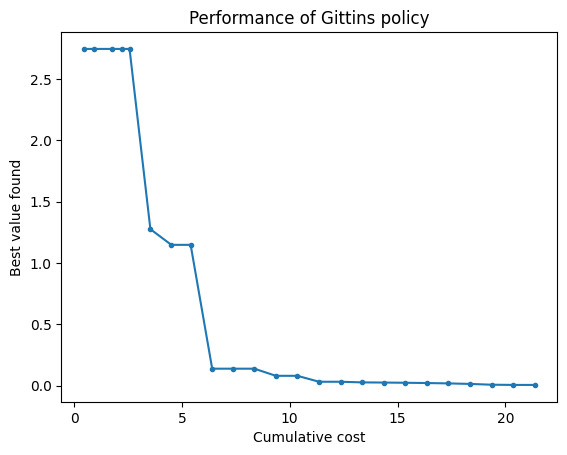

In [194]:
plt.plot(GI_cost_history, GI_best_history,'.-')
plt.xlabel('Cumulative cost')
plt.ylabel('Best value found')
plt.title("Performance of Gittins policy")

Text(0.5, 1.0, 'Performance of EI vs Gittins')

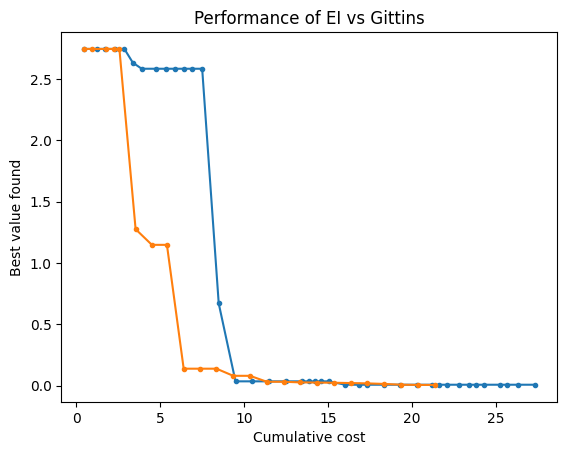

In [193]:
plt.plot(EI_cost_history, EI_best_history,'.-')
plt.plot(GI_cost_history, GI_best_history,'.-')
plt.xlabel('Cumulative cost')
plt.ylabel('Best value found')
plt.title("Performance of EI vs Gittins")

In [214]:
seed = 42
budget = 25

# Run trial with ExpectedImprovement
EI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=seed, cost=cost_function)
EI_optimizer.run_until_budget(budget, ExpectedImprovement)
EI_best_history = EI_optimizer.get_best_history()
EI_cost_history = EI_optimizer.get_cost_history()

# Run trial with GittinsIndex
GI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=seed, cost=cost_function)
GI_optimizer.run_until_budget(budget, GittinsIndex, lmbda=0.005)
GI_best_history = GI_optimizer.get_best_history()
GI_cost_history = GI_optimizer.get_cost_history()

Iteration 0, New point: [0.40094544 0.        ], New value: 3.468391044204371
Best observed value: 2.7448294453063906
Cumulative cost: 0.49037703116533315

Iteration 1, New point: [0.58357935 0.2146648 ], New value: 3.515023100485753
Best observed value: 2.7448294453063906
Cumulative cost: 1.229144042641539

Iteration 2, New point: [0.57976868 0.        ], New value: 3.228928304869346
Best observed value: 2.7448294453063906
Cumulative cost: 1.7228609597422078

Iteration 3, New point: [0.5295124  0.09064262], New value: 2.945780118690547
Best observed value: 2.7448294453063906
Cumulative cost: 2.3203118319208214

Iteration 4, New point: [0.59153385 0.05801677], New value: 3.3345652641114545
Best observed value: 2.7448294453063906
Cumulative cost: 2.8713031939987728

Iteration 5, New point: [0.51105891 0.00410276], New value: 2.6328459843301393
Best observed value: 2.6328459843301393
Cumulative cost: 3.375298492152265

Iteration 6, New point: [0.50289826 0.02907069], New value: 2.5833205

Iteration 16, New point: [0.50095793 0.4981566 ], New value: 0.01221141422505001
Best observed value: 0.009278471008443478
Cumulative cost: 14.33401127598466

Iteration 17, New point: [0.50084112 0.49784194], New value: 0.01367364653693004
Best observed value: 0.009278471008443478
Cumulative cost: 15.333989817584989

Iteration 18, New point: [0.50081612 0.49777923], New value: 0.013980133431204411
Best observed value: 0.009278471008443478
Cumulative cost: 16.33396742669577

Iteration 19, New point: [0.50080875 0.49776386], New value: 0.014053596715282612
Best observed value: 0.009278471008443478
Cumulative cost: 17.33394480958919

Iteration 20, New point: [0.50080534 0.49775867], New value: 0.014076553376153544
Best observed value: 0.009278471008443478
Cumulative cost: 18.333922121577526

Iteration 21, New point: [0.50080329 0.49775679], New value: 0.01408319718434159
Best observed value: 0.009278471008443478
Cumulative cost: 19.333899413026398

Iteration 22, New point: [0.50080166 0.4

Text(0.5, 1.0, 'Performance of EI vs Gittins')

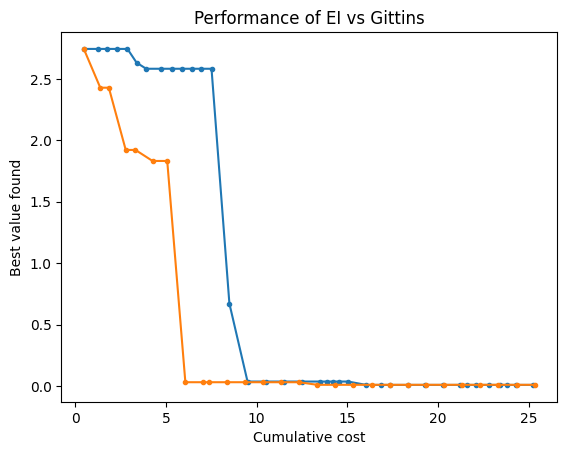

In [215]:
plt.plot(EI_cost_history, EI_best_history,'.-')
plt.plot(GI_cost_history, GI_best_history,'.-')
plt.xlabel('Cumulative cost')
plt.ylabel('Best value found')
plt.title("Performance of EI vs Gittins")

In [216]:
lmbda_values = [0.1, 0.05, 0.01, 0.005, 0.001]
num_trials = 30  # Number of trials for each lmbda
budget = 20  # Budget for cumulative cost

EI_best_histories = []
EI_cost_histories = []

GI_best_histories = {lmbda: [] for lmbda in lmbda_values}
GI_cost_histories = {lmbda: [] for lmbda in lmbda_values}

for trial in range(num_trials):
    
    seed = trial
    
    print("seed:", seed)
    
    # Run trial with ExpectedImprovement
    EI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=seed, cost=cost_function)
    EI_optimizer.run_until_budget(budget, ExpectedImprovement)
    EI_best_histories.append(EI_optimizer.get_best_history())
    EI_cost_histories.append(EI_optimizer.get_cost_history())

    for lmbda in lmbda_values:
        prin("lmbda:", lmbda)

        # Run trial with GittinsIndex for the current lambda
        GI_optimizer = BayesianOptimizer(objective, dim=2, maximize=False, seed=seed, cost=cost_function)
        GI_optimizer.run_until_budget(budget, GittinsIndex, lmbda=lmbda)
        GI_best_histories[lmbda].append(GI_optimizer.get_best_history())
        GI_cost_histories[lmbda].append(GI_optimizer.get_cost_history())
        print()
    print()

Iteration 0, New point: [0.41620534 0.75182294], New value: 3.3876901353139854
Best observed value: 1.290603175377051
Cumulative cost: 0.7801861683240233

Iteration 1, New point: [0.4973619  0.51628685], New value: 0.1220739932158108
Best observed value: 0.1220739932158108
Cumulative cost: 1.7790984690080451

Iteration 2, New point: [0.60246126 0.48625803], New value: 1.4126927241303489
Best observed value: 0.1220739932158108
Cumulative cost: 2.7381023914513856

Iteration 3, New point: [0.44813393 0.48542251], New value: 0.587701286571257
Best observed value: 0.1220739932158108
Cumulative cost: 3.726625277015523

Iteration 4, New point: [0.50709362 0.48941093], New value: 0.089325540623435
Best observed value: 0.089325540623435
Cumulative cost: 4.725975907428825

Iteration 5, New point: [0.51144242 0.50415027], New value: 0.08456397611258426
Best observed value: 0.08456397611258426
Cumulative cost: 5.725383643367445

Iteration 6, New point: [0. 1.], New value: 3.6253849384403627
Best o

Iteration 5, New point: [0.49593816 0.4712106 ], New value: 0.2520793717200225
Best observed value: 0.07097312025959868
Cumulative cost: 5.453021994589749

Iteration 6, New point: [0.49443602 0.50749346], New value: 0.06205347202515954
Best observed value: 0.06205347202515954
Cumulative cost: 6.452673677000471

Iteration 7, New point: [0.50132803 0.50190599], New value: 0.013715744232311256
Best observed value: 0.013715744232311256
Cumulative cost: 7.452652091625147

Iteration 8, New point: [0.50625933 0.50765217], New value: 0.06630718470916053
Best observed value: 0.013715744232311256
Cumulative cost: 8.452261304675723

Iteration 9, New point: [0.49806205 0.49916706], New value: 0.01240625395135142
Best observed value: 0.01240625395135142
Cumulative cost: 9.452243507248337

Iteration 10, New point: [0.49584976 0.49794296], New value: 0.028486775096326244
Best observed value: 0.01240625395135142
Cumulative cost: 10.452157690988102

Iteration 11, New point: [0.4975389  0.49880948], New

Iteration 15, New point: [0.5009473  0.50070869], New value: 0.006841456944095103
Best observed value: 0.003428883808120009
Cumulative cost: 14.564057415179413

Iteration 16, New point: [0.50094445 0.50070641], New value: 0.006819864516029117
Best observed value: 0.003428883808120009
Cumulative cost: 15.564051851244983

Iteration 17, New point: [0.50094706 0.50070803], New value: 0.006837953567757626
Best observed value: 0.003428883808120009
Cumulative cost: 16.5640462583867

Iteration 18, New point: [0.68309232 0.42322818], New value: 2.857883228546186
Best observed value: 0.003428883808120009
Cumulative cost: 17.427852639854972

Iteration 19, New point: [0.50093697 0.5007107 ], New value: 0.006799837430204736
Best observed value: 0.003428883808120009
Cumulative cost: 18.427847107859513

Iteration 20, New point: [0.50093774 0.50071155], New value: 0.006806503052633861
Best observed value: 0.003428883808120009
Cumulative cost: 19.427841565243572

Iteration 21, New point: [0.50093789 0.

Iteration 24, New point: [0.1094338  0.80702972], New value: 4.584166387570708
Best observed value: 0.006491835753280828
Cumulative cost: 18.760770678472053

Iteration 25, New point: [0.46594692 0.60239852], New value: 1.5064325159345668
Best observed value: 0.006491835753280828
Cumulative cost: 19.716263555427403

Iteration 26, New point: [0.33961509 0.51236589], New value: 2.28618306859487
Best observed value: 0.006491835753280828
Cumulative cost: 20.62246701958306

Iteration 0, New point: [0.59038554 0.51710927], New value: 1.219838981162781
Best observed value: 1.219838981162781
Cumulative cost: 0.9672591579413333

Iteration 1, New point: [0.67111389 0.45745991], New value: 2.5219009073570224
Best observed value: 1.219838981162781
Cumulative cost: 1.8566552095946964

Iteration 2, New point: [0.50987661 0.69074908], New value: 2.6330190319742965
Best observed value: 1.219838981162781
Cumulative cost: 2.729308071196109

Iteration 3, New point: [0.57182512 0.50357508], New value: 0.87

Iteration 7, New point: [0.63583184 0.49648491], New value: 1.9325198939302273
Best observed value: 0.02281708778964786
Cumulative cost: 6.354810400734533

Iteration 8, New point: [0.5234191  0.49339626], New value: 0.19955520731016607
Best observed value: 0.02281708778964786
Cumulative cost: 7.352447741636391

Iteration 9, New point: [0.48866409 0.51912652], New value: 0.17770257909888487
Best observed value: 0.02281708778964786
Cumulative cost: 8.350474337268663

Iteration 10, New point: [0.4972613  0.48977748], New value: 0.07175433103904938
Best observed value: 0.02281708778964786
Cumulative cost: 9.350026536039854

Iteration 11, New point: [0.49730124 0.50063987], New value: 0.016508926643429067
Best observed value: 0.016508926643429067
Cumulative cost: 10.34999576597897

Iteration 12, New point: [0.4969938  0.50084307], New value: 0.018699698494135664
Best observed value: 0.016508926643429067
Cumulative cost: 11.349956775458974

Iteration 13, New point: [0.49691306 0.50080373], N

Iteration 15, New point: [0.44488367 0.29063704], New value: 2.9563482871086078
Best observed value: 0.006333122796700952
Cumulative cost: 13.261864967372876

Iteration 16, New point: [0.49930816 0.49977168], New value: 0.004177762300230814
Best observed value: 0.004177762300230814
Cumulative cost: 14.26186284431091

Iteration 17, New point: [0.50033401 0.49967391], New value: 0.0026638061726882434
Best observed value: 0.0026638061726882434
Cumulative cost: 15.261861972717492

Iteration 18, New point: [0.50159549 0.49965726], New value: 0.009515009182206047
Best observed value: 0.0026638061726882434
Cumulative cost: 16.261851320534358

Iteration 19, New point: [0.50138484 0.4996434 ], New value: 0.008307178501084866
Best observed value: 0.0026638061726882434
Cumulative cost: 17.261843140845073

Iteration 20, New point: [0.50135249 0.49963724], New value: 0.008130103194858851
Best observed value: 0.0026638061726882434
Cumulative cost: 18.2618352976083

Iteration 21, New point: [0.501323

Iteration 19, New point: [0.50529061 0.49999466], New value: 0.03290685746704414
Best observed value: 0.027307384843052507
Cumulative cost: 19.24729887414862

Iteration 20, New point: [0.50529456 0.49999411], New value: 0.032933649573049895
Best observed value: 0.027307384843052507
Cumulative cost: 20.24718675705784

Iteration 0, New point: [0.54262278 0.38337909], New value: 1.7883140206452848
Best observed value: 1.7883140206452848
Cumulative cost: 0.9419135523041003

Iteration 1, New point: [0.47170032 0.01032665], New value: 2.685546583782529
Best observed value: 1.7883140206452848
Cumulative cost: 1.451513540516789

Iteration 2, New point: [0.41935781 0.5282612 ], New value: 1.1139378899339225
Best observed value: 1.1139378899339225
Cumulative cost: 2.4231349692331663

Iteration 3, New point: [0.39779458 0.79110274], New value: 3.6439243088374167
Best observed value: 1.1139378899339225
Cumulative cost: 3.147380604367061

Iteration 4, New point: [0.30780213 0.3785656 ], New value: 

Iteration 5, New point: [0.40851051 0.47101282], New value: 1.2965545196366617
Best observed value: 1.2965545196366617
Cumulative cost: 4.383197417624101

Iteration 6, New point: [0.50065823 0.53179444], New value: 0.28409902874982906
Best observed value: 0.28409902874982906
Cumulative cost: 5.379168437557921

Iteration 7, New point: [0.5586651  0.59762557], New value: 1.6383585713082884
Best observed value: 0.28409902874982906
Cumulative cost: 6.329838740005346

Iteration 8, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 0.28409902874982906
Cumulative cost: 6.6631720733386794

Iteration 9, New point: [0.53044063 0.4804501 ], New value: 0.33915525207970676
Best observed value: 0.28409902874982906
Cumulative cost: 7.657964016180757

Iteration 10, New point: [0.49115443 0.49484346], New value: 0.06905314093181092
Best observed value: 0.06905314093181092
Cumulative cost: 8.657544855869382

Iteration 11, New point: [0.49768791 0.49593176], New value: 0.0288012614470

Iteration 12, New point: [0.24185365 1.        ], New value: 4.658423181745533
Best observed value: 2.6375334576425264
Cumulative cost: 6.590400604665137

Iteration 13, New point: [0.45921665 0.68155552], New value: 2.627878227143747
Best observed value: 2.627878227143747
Cumulative cost: 7.46874718484727

Iteration 14, New point: [0.41734594 0.6301709 ], New value: 2.3241960533808315
Best observed value: 2.3241960533808315
Cumulative cost: 8.381901942545388

Iteration 15, New point: [0.41436253 0.5559137 ], New value: 1.4316049296792852
Best observed value: 1.4316049296792852
Cumulative cost: 9.341741787496497

Iteration 16, New point: [0.44995375 0.50492403], New value: 0.5328072434854545
Best observed value: 0.5328072434854545
Cumulative cost: 10.331727591814776

Iteration 17, New point: [0.50004072 0.47962453], New value: 0.15888019440556578
Best observed value: 0.15888019440556578
Cumulative cost: 11.33006969872973

Iteration 18, New point: [0.5406501  0.50437512], New value: 0.39

Iteration 38, New point: [0.50012218 0.        ], New value: 2.6375327672842315
Best observed value: 2.6375316483066453
Cumulative cost: 19.59166652801291

Iteration 39, New point: [0.50012206 0.        ], New value: 2.6375327639732586
Best observed value: 2.6375316483066453
Cumulative cost: 20.091666513115378

Iteration 0, New point: [0.2177709  0.64480507], New value: 3.8761621758090254
Best observed value: 3.69185629322708
Cumulative cost: 0.7130190337174901

Iteration 1, New point: [0.4481014 0.       ], New value: 2.915826879717859
Best observed value: 2.915826879717859
Cumulative cost: 1.2103400009092347

Iteration 2, New point: [0.510252 0.      ], New value: 2.64928729533391
Best observed value: 2.64928729533391
Cumulative cost: 1.7102349195716149

Iteration 3, New point: [0.50628034 0.21858882], New value: 3.2112627049323774
Best observed value: 2.64928729533391
Cumulative cost: 2.4695785739617486

Iteration 4, New point: [1. 1.], New value: 3.6253849384403627
Best observed va

Iteration 12, New point: [0.50070994 0.50096477], New value: 0.0069287593642219925
Best observed value: 0.0069287593642219925
Cumulative cost: 9.74014841978265

Iteration 13, New point: [0.49653655 0.51130525], New value: 0.08171267661451909
Best observed value: 0.0069287593642219925
Cumulative cost: 10.739589515579295

Iteration 14, New point: [0.49968848 0.49663619], New value: 0.020325081363079978
Best observed value: 0.0069287593642219925
Cumulative cost: 11.739543868750548

Iteration 15, New point: [0.50067864 0.49805631], New value: 0.012097520511350712
Best observed value: 0.0069287593642219925
Cumulative cost: 12.739526915022301

Iteration 16, New point: [0.50070318 0.49802152], New value: 0.012347407975884739
Best observed value: 0.0069287593642219925
Cumulative cost: 13.739509279868315

Iteration 17, New point: [0.50071437 0.49800685], New value: 0.012454709315456558
Best observed value: 0.0069287593642219925
Cumulative cost: 14.739491348295052

Iteration 18, New point: [0.50

Iteration 17, New point: [0.50251926 0.50151543], New value: 0.01755117050426991
Best observed value: 0.011582774106323246
Cumulative cost: 14.754947042066636

Iteration 18, New point: [0.50246488 0.50131602], New value: 0.016637803680325636
Best observed value: 0.011582774106323246
Cumulative cost: 15.754915812842542

Iteration 19, New point: [0.50243543 0.50123219], New value: 0.016233125154809347
Best observed value: 0.011582774106323246
Cumulative cost: 16.754886015265246

Iteration 20, New point: [0.5024156  0.50118214], New value: 0.015983423711990685
Best observed value: 0.011582774106323246
Cumulative cost: 17.754857085849988

Iteration 21, New point: [0.50240068 0.50114867], New value: 0.015809031498787096
Best observed value: 0.011582774106323246
Cumulative cost: 18.754828755843064

Iteration 22, New point: [0.50238803 0.50112353], New value: 0.015670910835091423
Best observed value: 0.011582774106323246
Cumulative cost: 19.7548008965242

Iteration 23, New point: [0.50237974 

Iteration 16, New point: [0.49994828 0.50099459], New value: 0.0057395238614046384
Best observed value: 0.0008299107277918161
Cumulative cost: 16.536453238653422

Iteration 17, New point: [0.49994793 0.50107445], New value: 0.006208411578203954
Best observed value: 0.0008299107277918161
Cumulative cost: 17.536448610024067

Iteration 18, New point: [0.49994862 0.50110761], New value: 0.006403268844664911
Best observed value: 0.0008299107277918161
Cumulative cost: 18.536443692294824

Iteration 19, New point: [0.49994934 0.50112295], New value: 0.006493416425467746
Best observed value: 0.0008299107277918161
Cumulative cost: 19.53643863797572

Iteration 20, New point: [0.49994994 0.5011311 ], New value: 0.006541260884365574
Best observed value: 0.0008299107277918161
Cumulative cost: 20.536433510434698

Iteration 0, New point: [0.15957089 0.23207496], New value: 4.527056908285438
Best observed value: 3.106256046411183
Cumulative cost: 0.5711990361727678

Iteration 1, New point: [0.44741721 

Iteration 4, New point: [0.5736288  0.40439112], New value: 1.7711929124481824
Best observed value: 0.27415631497336834
Cumulative cost: 4.255958779764939

Iteration 5, New point: [1. 1.], New value: 3.6253849384403627
Best observed value: 0.27415631497336834
Cumulative cost: 4.5892921130982725

Iteration 6, New point: [0.5737831  0.51506578], New value: 0.9339264564417395
Best observed value: 0.27415631497336834
Cumulative cost: 5.567111556743121

Iteration 7, New point: [0.47484693 0.47156977], New value: 0.3625023393545992
Best observed value: 0.27415631497336834
Cumulative cost: 6.5613807681708245

Iteration 8, New point: [0.50081    0.51151517], New value: 0.07943198934862439
Best observed value: 0.07943198934862439
Cumulative cost: 7.560848030798023

Iteration 9, New point: [0.50129384 0.50577734], New value: 0.037220387753322814
Best observed value: 0.037220387753322814
Cumulative cost: 8.56070784392055

Iteration 10, New point: [0.49410385 0.49896564], New value: 0.037675481469

Iteration 13, New point: [0. 0.], New value: 3.6253849384403627
Best observed value: 0.009910936054105424
Cumulative cost: 10.91988390346329

Iteration 14, New point: [0.71052743 0.85738284], New value: 4.355016164049189
Best observed value: 0.009910936054105424
Cumulative cost: 11.512238789065005

Iteration 15, New point: [0.38126463 0.68980655], New value: 3.2224900216222214
Best observed value: 0.009910936054105424
Cumulative cost: 12.345226119869842

Iteration 16, New point: [0.70081561 0.        ], New value: 4.44849505090076
Best observed value: 0.009910936054105424
Cumulative cost: 12.807908980439306

Iteration 17, New point: [0.28129466 0.        ], New value: 4.540082398565907
Best observed value: 0.009910936054105424
Cumulative cost: 13.264253237960729

Iteration 18, New point: [1.         0.65774664], New value: 4.124841917474956
Best observed value: 0.009910936054105424
Cumulative cost: 13.740548951011826

Iteration 19, New point: [0.         0.70632659], New value: 4.47930

Iteration 15, New point: [0.49978788 0.49836329], New value: 0.009626175975580242
Best observed value: 0.004587660957913631
Cumulative cost: 14.811438699160007

Iteration 16, New point: [0.49974288 0.49828754], New value: 0.010115082367555761
Best observed value: 0.004587660957913631
Cumulative cost: 15.811426704790348

Iteration 17, New point: [0.4997159  0.49824029], New value: 0.010421684215242255
Best observed value: 0.004587660957913631
Cumulative cost: 16.811413995844692

Iteration 18, New point: [0.49969889 0.49820977], New value: 0.010620302772331502
Best observed value: 0.004587660957913631
Cumulative cost: 17.811400813663933

Iteration 19, New point: [0.499688   0.49818924], New value: 0.010753720794792532
Best observed value: 0.004587660957913631
Cumulative cost: 18.811387309054325

Iteration 20, New point: [0.49968007 0.49817535], New value: 0.010844747710635705
Best observed value: 0.004587660957913631
Cumulative cost: 19.8113735823718

Iteration 21, New point: [0.49967456

Iteration 23, New point: [0.50167374 0.50001345], New value: 0.0097668084000202
Best observed value: 0.0038456196720706437
Cumulative cost: 20.79578413138407

Iteration 0, New point: [1.         0.32026619], New value: 4.308648200272099
Best observed value: 2.2669401425541307
Cumulative cost: 0.4696562221355427

Iteration 1, New point: [0.74617942 0.86042837], New value: 4.4869789341722885
Best observed value: 2.2669401425541307
Cumulative cost: 1.0371764729618778

Iteration 2, New point: [0.01649101 1.        ], New value: 3.6006682016844285
Best observed value: 2.2669401425541307
Cumulative cost: 1.377877607772641

Iteration 3, New point: [0.47102649 0.50427323], New value: 0.2545336369776554
Best observed value: 0.2545336369776554
Cumulative cost: 2.374458440483183

Iteration 4, New point: [0.50053919 0.6401268 ], New value: 1.9953860541545514
Best observed value: 0.2545336369776554
Cumulative cost: 3.301634984032414

Iteration 5, New point: [0.41492911 0.38231783], New value: 2.191

Iteration 0, New point: [0.         0.66455487], New value: 4.185912123083398
Best observed value: 2.946633977906363
Cumulative cost: 0.4743128241101662

Iteration 1, New point: [0.         0.33785431], New value: 4.164724668773328
Best observed value: 2.946633977906363
Cumulative cost: 0.94933499501092

Iteration 2, New point: [0.03192858 0.47692043], New value: 2.6426538180427213
Best observed value: 2.6426538180427213
Cumulative cost: 1.4816763068933625

Iteration 3, New point: [0.15947325 0.49099862], New value: 3.223034166320485
Best observed value: 2.6426538180427213
Cumulative cost: 2.1646627173719106

Iteration 4, New point: [0.        0.4935671], New value: 2.64216912624913
Best observed value: 2.64216912624913
Cumulative cost: 2.6646213386483044

Iteration 5, New point: [0.01383169 0.48448161], New value: 2.616542932559071
Best observed value: 2.616542932559071
Cumulative cost: 3.1783898721004546

Iteration 6, New point: [0.0075053  0.48263643], New value: 2.6401388978521756


Iteration 16, New point: [0.         0.50199946], New value: 2.63797969170712
Best observed value: 2.6379795315440266
Cumulative cost: 8.395695381854226

Iteration 17, New point: [0.         0.50199568], New value: 2.6379779963859424
Best observed value: 2.6379779963859424
Cumulative cost: 8.895691399145045

Iteration 18, New point: [0.         0.50199398], New value: 2.637977236670935
Best observed value: 2.637977236670935
Cumulative cost: 9.395687423207066

Iteration 19, New point: [0.         0.50198751], New value: 2.6379743458187126
Best observed value: 2.6379743458187126
Cumulative cost: 9.895683473034701

Iteration 20, New point: [0.        0.5019952], New value: 2.637977780638814
Best observed value: 2.6379743458187126
Cumulative cost: 10.395679492248435

Iteration 21, New point: [0.         0.50198025], New value: 2.637971114619756
Best observed value: 2.637971114619756
Cumulative cost: 10.895675570875085

Iteration 22, New point: [0.         0.50198222], New value: 2.63797199

Iteration 3, New point: [0.         0.55855787], New value: 2.984179156321066
Best observed value: 2.6740549801660873
Cumulative cost: 2.2270808275668017

Iteration 4, New point: [1.         0.45519481], New value: 2.849276016977314
Best observed value: 2.6740549801660873
Cumulative cost: 2.725081350383529

Iteration 5, New point: [0.63354586 0.45958112], New value: 2.0251027889117634
Best observed value: 2.0251027889117634
Cumulative cost: 3.6528346624112165

Iteration 6, New point: [0.69283693 0.51316076], New value: 2.6585087335688447
Best observed value: 2.0251027889117634
Cumulative cost: 4.522825679756224

Iteration 7, New point: [0.53560208 0.4105052 ], New value: 1.3082728001360668
Best observed value: 1.3082728001360668
Cumulative cost: 5.487046056059688

Iteration 8, New point: [0.40909001 0.33870415], New value: 2.751150811125378
Best observed value: 1.3082728001360668
Cumulative cost: 6.366457697971945

Iteration 9, New point: [1. 1.], New value: 3.6253849384403627
Best obs

Iteration 8, New point: [0.51658614 0.48318807], New value: 0.19213450130012477
Best observed value: 0.19213450130012477
Cumulative cost: 8.162125661805272

Iteration 9, New point: [0.48909254 0.50068092], New value: 0.07449368572272563
Best observed value: 0.07449368572272563
Cumulative cost: 9.16164814418522

Iteration 10, New point: [0.38916476 0.46581019], New value: 1.6424531231575057
Best observed value: 0.07449368572272563
Cumulative cost: 10.11058259229707

Iteration 11, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 0.07449368572272563
Cumulative cost: 10.443915925630403

Iteration 12, New point: [0.49699108 0.50163816], New value: 0.02062988725197501
Best observed value: 0.02062988725197501
Cumulative cost: 11.44386897913228

Iteration 13, New point: [0.50128852 0.50804581], New value: 0.05315075553866366
Best observed value: 0.02062988725197501
Cumulative cost: 12.44360346814648

Iteration 14, New point: [0.         0.57392689], New value: 3.158456620

Iteration 14, New point: [0.50295385 0.49773096], New value: 0.02254755294065136
Best observed value: 0.011514379336013736
Cumulative cost: 13.997019054119427

Iteration 15, New point: [0.50295833 0.49770603], New value: 0.022668739178204778
Best observed value: 0.011514379336013736
Cumulative cost: 14.99696300113258

Iteration 16, New point: [0.50296035 0.4976987 ], New value: 0.022708053322542998
Best observed value: 0.011514379336013736
Cumulative cost: 15.996906765601253

Iteration 17, New point: [0.50296141 0.49769609], New value: 0.022723758027613616
Best observed value: 0.011514379336013736
Cumulative cost: 16.99685045707667

Iteration 18, New point: [0.50296211 0.49769528], New value: 0.02273054968918986
Best observed value: 0.011514379336013736
Cumulative cost: 17.99679411697248

Iteration 19, New point: [0.50296265 0.49769479], New value: 0.022735236043399443
Best observed value: 0.011514379336013736
Cumulative cost: 18.99673775507333

Iteration 20, New point: [0.50296292 0.4

Iteration 22, New point: [0.4988325  0.50175049], New value: 0.012374172776695946
Best observed value: 0.0008655261331864672
Cumulative cost: 20.726011090246903

Iteration 0, New point: [1.         0.80899316], New value: 4.6413327100069495
Best observed value: 3.2749293009517193
Cumulative cost: 0.4198316562412988

Iteration 1, New point: [0.35149285 0.63714534], New value: 3.028464400867574
Best observed value: 3.028464400867574
Cumulative cost: 1.279342186019135

Iteration 2, New point: [0.         0.72594525], New value: 4.5703124939876965
Best observed value: 3.028464400867574
Cumulative cost: 1.733020489573576

Iteration 3, New point: [0.51360595 0.5297746 ], New value: 0.29582639097843755
Best observed value: 0.29582639097843755
Cumulative cost: 2.728752191625584

Iteration 4, New point: [0.86735775 0.48934974], New value: 3.128311750352989
Best observed value: 0.29582639097843755
Cumulative cost: 3.3779929887388196

Iteration 5, New point: [0.4711587  0.41953693], New value: 1.

Iteration 1, New point: [0.52305477 0.49974064], New value: 0.18606402113275466
Best observed value: 0.18606402113275466
Cumulative cost: 1.8209160836281335

Iteration 2, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 0.18606402113275466
Cumulative cost: 2.1542494169614668

Iteration 3, New point: [0.57367151 0.53459024], New value: 1.0477072950266586
Best observed value: 0.18606402113275466
Cumulative cost: 3.128437427073404

Iteration 4, New point: [0.48608393 0.5170087 ], New value: 0.17509925484774458
Best observed value: 0.17509925484774458
Cumulative cost: 4.126509339951807

Iteration 5, New point: [0.50148714 0.50201352], New value: 0.014827343843972773
Best observed value: 0.014827343843972773
Cumulative cost: 5.12648427717337

Iteration 6, New point: [0.48522905 0.4800357 ], New value: 0.20509583088803796
Best observed value: 0.014827343843972773
Cumulative cost: 6.124023331653457

Iteration 7, New point: [0.50273922 0.50274704], New value: 0.0235473949

Iteration 12, New point: [0.50004308 0.49964909], New value: 0.0020132394820575605
Best observed value: 0.0020132394820575605
Cumulative cost: 11.263349331585282

Iteration 13, New point: [0.50034464 0.49998374], New value: 0.0019644303932406793
Best observed value: 0.0019644303932406793
Cumulative cost: 12.263348855419059

Iteration 14, New point: [0.50063112 0.50031699], New value: 0.00404829591394007
Best observed value: 0.0019644303932406793
Cumulative cost: 13.263346860251625

Iteration 15, New point: [0.50079296 0.50051227], New value: 0.0054351889584833835
Best observed value: 0.0019644303932406793
Cumulative cost: 14.263343295458832

Iteration 16, New point: [0.50085563 0.50058757], New value: 0.005986256260833489
Best observed value: 0.0019644303932406793
Cumulative cost: 15.263338986149854

Iteration 17, New point: [0.5008801  0.50061607], New value: 0.006200053826138419
Best observed value: 0.0019644303932406793
Cumulative cost: 16.263334369733432

Iteration 18, New point: [

Iteration 19, New point: [0.49556303 0.50151205], New value: 0.028855570733917535
Best observed value: 0.026671688059572762
Cumulative cost: 17.283568528605194

Iteration 20, New point: [0.49557804 0.50150738], New value: 0.02875105027157021
Best observed value: 0.026671688059572762
Cumulative cost: 18.283481232388723

Iteration 21, New point: [0.49559196 0.50150223], New value: 0.028652377280654395
Best observed value: 0.026671688059572762
Cumulative cost: 19.283394489829327

Iteration 22, New point: [0.49560319 0.50149967], New value: 0.02857624628758204
Best observed value: 0.026671688059572762
Cumulative cost: 20.2833081734195

Iteration 0, New point: [0.43961579 0.62982489], New value: 2.1175611769548195
Best observed value: 2.1175611769548195
Cumulative cost: 0.9242118428959638

Iteration 1, New point: [0.46707908 0.50244315], New value: 0.2987570366217658
Best observed value: 0.2987570366217658
Cumulative cost: 1.9198717381392343

Iteration 2, New point: [0.26675357 0.45796782],

Iteration 0, New point: [0.36723997 0.66290011], New value: 3.115049046828315
Best observed value: 2.317309036889004
Cumulative cost: 0.8498727902366352

Iteration 1, New point: [0.53058872 0.87190263], New value: 3.162585019257254
Best observed value: 2.317309036889004
Cumulative cost: 1.4921381082464573

Iteration 2, New point: [0.5191498  0.52977071], New value: 0.3292033303191393
Best observed value: 0.3292033303191393
Cumulative cost: 2.48715106242142

Iteration 3, New point: [0.7757141 0.4627481], New value: 3.2593236641047167
Best observed value: 0.3292033303191393
Cumulative cost: 3.2507290838634337

Iteration 4, New point: [0.43969566 0.45765633], New value: 0.9184756844210011
Best observed value: 0.3292033303191393
Cumulative cost: 4.229472346837264

Iteration 5, New point: [0.54347689 0.4802016 ], New value: 0.4978604390387713
Best observed value: 0.3292033303191393
Cumulative cost: 5.220426062751207

Iteration 6, New point: [0.5000672  0.50909149], New value: 0.060210999666

Iteration 10, New point: [0.50357822 0.49869843], New value: 0.02308251679084039
Best observed value: 0.02308251679084039
Cumulative cost: 9.42052470935621

Iteration 11, New point: [0.49427713 0.50059117], New value: 0.03606754231339737
Best observed value: 0.02308251679084039
Cumulative cost: 10.420392324129867

Iteration 12, New point: [0.49844839 0.50011099], New value: 0.00905739745920231
Best observed value: 0.00905739745920231
Cumulative cost: 11.42038264494017

Iteration 13, New point: [0.49823814 0.49994977], New value: 0.010301496409411914
Best observed value: 0.00905739745920231
Cumulative cost: 12.420370218416947

Iteration 14, New point: [0.49821151 0.4997285 ], New value: 0.010581660590393671
Best observed value: 0.00905739745920231
Cumulative cost: 13.420357128940555

Iteration 15, New point: [0.49823218 0.49949169], New value: 0.010765849614970069
Best observed value: 0.00905739745920231
Cumulative cost: 14.420343594842132

Iteration 16, New point: [0.49826785 0.4992473

Iteration 18, New point: [0.69340873 0.        ], New value: 4.403366543292702
Best observed value: 0.0036591622609596364
Cumulative cost: 14.20681423251496

Iteration 19, New point: [0.76211207 0.54330016], New value: 3.2303044074627363
Best observed value: 0.0036591622609596364
Cumulative cost: 14.986656518052113

Iteration 20, New point: [1. 1.], New value: 3.6253849384403627
Best observed value: 0.0036591622609596364
Cumulative cost: 15.319989851385447

Iteration 21, New point: [0.32201975 0.19820263], New value: 4.111909478079273
Best observed value: 0.0036591622609596364
Cumulative cost: 15.990665155017826

Iteration 22, New point: [0.76777284 0.30398496], New value: 4.094018073088346
Best observed value: 0.0036591622609596364
Cumulative cost: 16.684870119964987

Iteration 23, New point: [1.         0.65973378], New value: 4.143048372674109
Best observed value: 0.0036591622609596364
Cumulative cost: 17.16059404216567

Iteration 24, New point: [0.73406022 0.99240616], New value: 4

Iteration 20, New point: [0.49801218 0.5027736 ], New value: 0.020543192799689525
Best observed value: 0.016174800984931625
Cumulative cost: 19.54040454844455

Iteration 21, New point: [0.4980133  0.50278512], New value: 0.020598812668382482
Best observed value: 0.016174800984931625
Cumulative cost: 20.540357735291106

Iteration 0, New point: [0.28308121 1.        ], New value: 4.532023605946172
Best observed value: 2.746442756080889
Cumulative cost: 0.45699347543734686

Iteration 1, New point: [0.48283817 0.52709801], New value: 0.28797452418713165
Best observed value: 0.28797452418713165
Cumulative cost: 1.452895020197285

Iteration 2, New point: [0.57019568 0.18669154], New value: 3.486196989461025
Best observed value: 0.28797452418713165
Cumulative cost: 2.1609305541060606

Iteration 3, New point: [1. 0.], New value: 3.6253849384403627
Best observed value: 0.28797452418713165
Cumulative cost: 2.494263887439394

Iteration 4, New point: [0.55314568 0.56063829], New value: 1.043107611

Iteration 7, New point: [0.44762892 0.49149925], New value: 0.5744035610685398
Best observed value: 0.46485191201635745
Cumulative cost: 5.9552504016731795

Iteration 8, New point: [0.50745457 0.50648755], New value: 0.06627753176992757
Best observed value: 0.06627753176992757
Cumulative cost: 6.954859918362241

Iteration 9, New point: [0.57909213 0.53019088], New value: 1.1015077922809096
Best observed value: 0.06627753176992757
Cumulative cost: 7.92699066344313

Iteration 10, New point: [0.49044994 0.51565541], New value: 0.13922423546173635
Best observed value: 0.06627753176992757
Cumulative cost: 8.925647287982441

Iteration 11, New point: [0.49924094 0.49585975], New value: 0.025697233690622046
Best observed value: 0.025697233690622046
Cumulative cost: 9.925576421803518

Iteration 12, New point: [0.49935894 0.49520391], New value: 0.029863992262889827
Best observed value: 0.025697233690622046
Cumulative cost: 10.92548277694623

Iteration 13, New point: [0.50440197 0.4948269 ], New

Iteration 10, New point: [0.50418882 0.49858553], New value: 0.027090829113415982
Best observed value: 0.027090829113415982
Cumulative cost: 10.22531150810576

Iteration 11, New point: [0.50194671 0.49886003], New value: 0.01330347346067784
Best observed value: 0.01330347346067784
Cumulative cost: 11.225291151602931

Iteration 12, New point: [0.50232141 0.49867393], New value: 0.01588451560309112
Best observed value: 0.01330347346067784
Cumulative cost: 12.22526256286313

Iteration 13, New point: [0.50248415 0.49862008], New value: 0.016934943492632915
Best observed value: 0.01330347346067784
Cumulative cost: 13.225230263116904

Iteration 14, New point: [0.50255747 0.49860134], New value: 0.017394235024735583
Best observed value: 0.01330347346067784
Cumulative cost: 14.225196276661551

Iteration 15, New point: [0.50259245 0.49859451], New value: 0.017607685602691436
Best observed value: 0.01330347346067784
Cumulative cost: 15.225161493176039

Iteration 16, New point: [0.50261363 0.4985

Iteration 19, New point: [0.50089197 0.50122015], New value: 0.008793164535277231
Best observed value: 0.005679840330277575
Cumulative cost: 17.858092317062116

Iteration 20, New point: [0.5008045  0.50122247], New value: 0.008506552382840926
Best observed value: 0.005679840330277575
Cumulative cost: 18.858083750541226

Iteration 21, New point: [0.50070769 0.50122346], New value: 0.008208112131715684
Best observed value: 0.005679840330277575
Cumulative cost: 19.85807575991275

Iteration 22, New point: [0.50059858 0.5012228 ], New value: 0.007898891039552769
Best observed value: 0.005679840330277575
Cumulative cost: 20.858068345875562

Iteration 0, New point: [0.25092659 0.44479135], New value: 3.219733715210421
Best observed value: 3.219733715210421
Cumulative cost: 0.7934352843909065

Iteration 1, New point: [0.59164195 0.73470972], New value: 3.3437176449309516
Best observed value: 3.219733715210421
Cumulative cost: 1.5909167788609495

Iteration 2, New point: [0.14216742 0.86948361],

Iteration 1, New point: [0.53535624 0.58246788], New value: 1.1932941118762739
Best observed value: 1.1932941118762739
Cumulative cost: 1.9027529696152423

Iteration 2, New point: [0.51301344 0.77678249], New value: 3.204269891965837
Best observed value: 1.1932941118762739
Cumulative cost: 2.6677985997878895

Iteration 3, New point: [0.49984072 0.52550904], New value: 0.21214692703219074
Best observed value: 0.21214692703219074
Cumulative cost: 3.665202411989005

Iteration 4, New point: [0.46510547 0.4938145 ], New value: 0.3289739980244062
Best observed value: 0.21214692703219074
Cumulative cost: 4.660203966154426

Iteration 5, New point: [0.50442454 0.50105059], New value: 0.027926200204920537
Best observed value: 0.027926200204920537
Cumulative cost: 5.6601212516433215

Iteration 6, New point: [0.51377862 0.49037137], New value: 0.12495521726765846
Best observed value: 0.027926200204920537
Cumulative cost: 6.6589922849627765

Iteration 7, New point: [0.49340899 0.47856339], New valu

Iteration 5, New point: [0.4861611  0.51251773], New value: 0.1423073874369405
Best observed value: 0.1423073874369405
Cumulative cost: 5.007863150332798

Iteration 6, New point: [0.48748155 0.51050617], New value: 0.12069680267554306
Best observed value: 0.12069680267554306
Cumulative cost: 6.006795925601674

Iteration 7, New point: [0.49678494 0.50097778], New value: 0.020212024908563553
Best observed value: 0.020212024908563553
Cumulative cost: 7.00675075692646

Iteration 8, New point: [0.51060917 0.48979774], New value: 0.10620497439140353
Best observed value: 0.020212024908563553
Cumulative cost: 8.005884945000284

Iteration 9, New point: [0.49963614 0.50031852], New value: 0.0027604371920060267
Best observed value: 0.0027604371920060267
Cumulative cost: 9.005884009611004

Iteration 10, New point: [0.50136437 0.50390725], New value: 0.025234971438259368
Best observed value: 0.0027604371920060267
Cumulative cost: 10.005815501755956

Iteration 11, New point: [0.49914693 0.49924143],

Iteration 14, New point: [0.49993375 0.5031094 ], New value: 0.018623380381005195
Best observed value: 0.01761966764086198
Cumulative cost: 12.897681023817054

Iteration 15, New point: [0.49994124 0.50309339], New value: 0.018521273863474352
Best observed value: 0.01761966764086198
Cumulative cost: 13.89764273530298

Iteration 16, New point: [0.49994554 0.50308513], New value: 0.018468625197162414
Best observed value: 0.01761966764086198
Cumulative cost: 14.897604652862393

Iteration 17, New point: [0.49994813 0.50307946], New value: 0.01843255762764473
Best observed value: 0.01761966764086198
Cumulative cost: 15.89756671130719

Iteration 18, New point: [0.49995    0.50307669], New value: 0.01841490583416716
Best observed value: 0.01761966764086198
Cumulative cost: 16.897528838617276

Iteration 19, New point: [0.49995074 0.5030752 ], New value: 0.018405409432081132
Best observed value: 0.01761966764086198
Cumulative cost: 17.897491002952673

Iteration 20, New point: [0.49995186 0.50307

Iteration 21, New point: [0.2010908 0.       ], New value: 4.660616079557457
Best observed value: 0.017365025775796017
Cumulative cost: 16.948874201696267

Iteration 22, New point: [1. 0.], New value: 3.6253849384403627
Best observed value: 0.017365025775796017
Cumulative cost: 17.2822075350296

Iteration 23, New point: [0.49795194 0.49923406], New value: 0.012878483118751394
Best observed value: 0.012878483118751394
Cumulative cost: 18.28218841047622

Iteration 24, New point: [0.48066524 0.48843337], New value: 0.1807604988682603
Best observed value: 0.012878483118751394
Cumulative cost: 19.280162045297224

Iteration 25, New point: [0.58890282 0.46021493], New value: 1.330982376302043
Best observed value: 0.012878483118751394
Cumulative cost: 20.243603067499816

Iteration 0, New point: [0.51462407 0.65488748], New value: 2.218331660066664
Best observed value: 2.218331660066664
Cumulative cost: 0.9117299733713613

Iteration 1, New point: [0.59261654 0.74390778], New value: 3.4006665263

Iteration 6, New point: [0.70417803 0.51382926], New value: 2.7672343433956326
Best observed value: 0.3361099798991636
Cumulative cost: 5.796541693192074

Iteration 7, New point: [0.46163063 0.45657712], New value: 0.6555677505473452
Best observed value: 0.3361099798991636
Cumulative cost: 6.78328867490645

Iteration 8, New point: [0.49750864 0.50858349], New value: 0.05904698241454698
Best observed value: 0.05904698241454698
Cumulative cost: 7.782969244226875

Iteration 9, New point: [0.50268166 0.52974952], New value: 0.2612772277424402
Best observed value: 0.05904698241454698
Cumulative cost: 8.779413034093837

Iteration 10, New point: [0.49053232 0.49944786], New value: 0.0631999535458374
Best observed value: 0.05904698241454698
Cumulative cost: 9.779053396115785

Iteration 11, New point: [0.49690555 0.50177913], New value: 0.021548400102205267
Best observed value: 0.021548400102205267
Cumulative cost: 10.779002435084866

Iteration 12, New point: [0.50626739 0.4808377 ], New value:

Iteration 14, New point: [0.50227317 0.49957628], New value: 0.013649922981720852
Best observed value: 0.013649922981720852
Cumulative cost: 12.997965722851214

Iteration 15, New point: [0.50262025 0.4995426 ], New value: 0.015799887476493968
Best observed value: 0.013649922981720852
Cumulative cost: 13.99793742405682

Iteration 16, New point: [0.50275613 0.49954561], New value: 0.016632368946730924
Best observed value: 0.013649922981720852
Cumulative cost: 14.997906214170593

Iteration 17, New point: [0.50281489 0.49955028], New value: 0.01699062871923518
Best observed value: 0.013649922981720852
Cumulative cost: 15.997873711884687

Iteration 18, New point: [0.50283659 0.499552  ], New value: 0.01712322363319929
Best observed value: 0.013649922981720852
Cumulative cost: 16.997840725271683

Iteration 19, New point: [0.50284261 0.4995515 ], New value: 0.017161011182406316
Best observed value: 0.013649922981720852
Cumulative cost: 17.99780760004108

Iteration 20, New point: [0.50284337 0

Iteration 15, New point: [0.49583219 0.50198592], New value: 0.028385269520374568
Best observed value: 0.028385269520374568
Cumulative cost: 15.037851261961995

Iteration 16, New point: [0.49607055 0.50204012], New value: 0.02713247219491466
Best observed value: 0.02713247219491466
Cumulative cost: 16.037772857296325

Iteration 17, New point: [0.49644645 0.5021134 ], New value: 0.025208210841985323
Best observed value: 0.025208210841985323
Cumulative cost: 17.0377044852924

Iteration 18, New point: [0.49708522 0.50222563], New value: 0.022177584218785018
Best observed value: 0.022177584218785018
Cumulative cost: 18.037650690874962

Iteration 19, New point: [0.49814814 0.50242027], New value: 0.018228034218406908
Best observed value: 0.018228034218406908
Cumulative cost: 19.03761354400842

Iteration 20, New point: [0.49937152 0.50272562], New value: 0.01665615682522459
Best observed value: 0.01665615682522459
Cumulative cost: 20.037582249057937

Iteration 0, New point: [0.34281791 0.669

Iteration 3, New point: [0.53601228 0.57142935], New value: 1.024421941018208
Best observed value: 0.3842745309203406
Cumulative cost: 2.737471921802345

Iteration 4, New point: [0.5553331  0.42122488], New value: 1.3239980038111772
Best observed value: 0.3842745309203406
Cumulative cost: 3.7017278360161168

Iteration 5, New point: [1. 0.], New value: 3.6253849384403627
Best observed value: 0.3842745309203406
Cumulative cost: 4.03506116934945

Iteration 6, New point: [0.40968079 0.40413762], New value: 1.9725222560407372
Best observed value: 0.3842745309203406
Cumulative cost: 4.970174915940831

Iteration 7, New point: [0.46326733 0.58822333], New value: 1.296212159678785
Best observed value: 0.3842745309203406
Cumulative cost: 5.934931789063278

Iteration 8, New point: [0.50838026 0.50861051], New value: 0.0832880348639411
Best observed value: 0.0832880348639411
Cumulative cost: 6.934354644043712

Iteration 9, New point: [0.4332557  0.51448614], New value: 0.8168982087402736
Best obse

Iteration 10, New point: [0.06952372 0.95229646], New value: 3.8730767038188465
Best observed value: 0.05272252961630075
Cumulative cost: 9.649017436493807

Iteration 11, New point: [0. 0.], New value: 3.6253849384403627
Best observed value: 0.05272252961630075
Cumulative cost: 9.982350769827141

Iteration 12, New point: [0.503378   0.50036834], New value: 0.020451547321439723
Best observed value: 0.020451547321439723
Cumulative cost: 10.98230458561013

Iteration 13, New point: [1.         0.46727833], New value: 2.753745836912558
Best observed value: 0.020451547321439723
Cumulative cost: 11.481236166045765

Iteration 14, New point: [0.63522073 0.61306569], New value: 2.6802073144026193
Best observed value: 0.020451547321439723
Cumulative cost: 12.37069906270869

Iteration 15, New point: [0.40517794 1.        ], New value: 3.415549466116563
Best observed value: 0.020451547321439723
Cumulative cost: 12.86186666746341

Iteration 16, New point: [0.28712159 0.7313359 ], New value: 4.026482

Iteration 16, New point: [0.50006351 0.49669579], New value: 0.019857761985946798
Best observed value: 0.01183753572223667
Cumulative cost: 16.36526367481903

Iteration 17, New point: [0.50007204 0.4966855 ], New value: 0.019924367528326048
Best observed value: 0.01183753572223667
Cumulative cost: 17.36521971227141

Iteration 18, New point: [0.50007723 0.49667919], New value: 0.019965202158460205
Best observed value: 0.01183753572223667
Cumulative cost: 18.365175579374295

Iteration 19, New point: [0.50008131 0.4966759 ], New value: 0.019986785961098708
Best observed value: 0.01183753572223667
Cumulative cost: 19.365131356317956

Iteration 20, New point: [0.5000833  0.49667226], New value: 0.020010257586918545
Best observed value: 0.01183753572223667
Cumulative cost: 20.36508703512379

Iteration 0, New point: [0.49098465 0.5544746 ], New value: 0.6072828386477274
Best observed value: 0.6072828386477274
Cumulative cost: 0.9879518932935923

Iteration 1, New point: [0.80836856 0.79317034]

Iteration 4, New point: [0.79403149 0.39845126], New value: 3.6471301272821894
Best observed value: 0.7915772550675908
Cumulative cost: 3.818304217316573

Iteration 5, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 0.7915772550675908
Cumulative cost: 4.151637550649906

Iteration 6, New point: [0.59471671 0.38246818], New value: 2.292355211022955
Best observed value: 0.7915772550675908
Cumulative cost: 5.068110282777295

Iteration 7, New point: [0.44742219 0.4951971 ], New value: 0.5701610879737946
Best observed value: 0.5701610879737946
Cumulative cost: 6.057083257896007

Iteration 8, New point: [0.48527133 0.5331931 ], New value: 0.34058615685557614
Best observed value: 0.34058615685557614
Cumulative cost: 7.051836074290599

Iteration 9, New point: [0.40805571 0.54920148], New value: 1.4605906375502653
Best observed value: 0.34058615685557614
Cumulative cost: 8.010151135182829

Iteration 10, New point: [0.50414514 0.4830025 ], New value: 0.1312597298718967
Best

Iteration 6, New point: [0.4782232  0.49788796], New value: 0.17396060486579445
Best observed value: 0.08679385335678136
Cumulative cost: 6.329187757189719

Iteration 7, New point: [0.50185187 0.50524635], New value: 0.034766361215532005
Best observed value: 0.034766361215532005
Cumulative cost: 7.329063957888067

Iteration 8, New point: [0.50671526 0.49451586], New value: 0.057036097278118536
Best observed value: 0.034766361215532005
Cumulative cost: 8.328763366056842

Iteration 9, New point: [0.50220602 0.49982436], New value: 0.013040200300225013
Best observed value: 0.013040200300225013
Cumulative cost: 9.328743776879282

Iteration 10, New point: [0.49670559 0.49472389], New value: 0.039303226876246544
Best observed value: 0.013040200300225013
Cumulative cost: 10.328589038904601

Iteration 11, New point: [0.50007025 0.49928383], New value: 0.004125859550584199
Best observed value: 0.004125859550584199
Cumulative cost: 11.328586967579655

Iteration 12, New point: [0.49909026 0.50015

Iteration 16, New point: [0.50004092 0.49775391], New value: 0.013245346371868028
Best observed value: 0.0055041967479252385
Cumulative cost: 14.959072714996685

Iteration 17, New point: [0.5000102  0.49771819], New value: 0.013462480050062897
Best observed value: 0.0055041967479252385
Cumulative cost: 15.959051888419028

Iteration 18, New point: [0.49999026 0.49769657], New value: 0.013595310682717798
Best observed value: 0.0055041967479252385
Cumulative cost: 16.95903066540075

Iteration 19, New point: [0.49997613 0.49768235], New value: 0.01368337804265396
Best observed value: 0.0055041967479252385
Cumulative cost: 17.959009177645246

Iteration 20, New point: [0.49996543 0.4976726 ], New value: 0.013744217307970263
Best observed value: 0.0055041967479252385
Cumulative cost: 18.958987506121115

Iteration 21, New point: [0.49995739 0.49766441], New value: 0.013795406419220502
Best observed value: 0.0055041967479252385
Cumulative cost: 19.95896567942008

Iteration 22, New point: [0.499

Iteration 22, New point: [0.50027359 0.50204987], New value: 0.012154127041480667
Best observed value: 0.006325388927927111
Cumulative cost: 20.397491422387972

Iteration 0, New point: [0.68875825 0.21793703], New value: 4.1080739517333065
Best observed value: 3.1461235409922144
Cumulative cost: 0.6845766543526972

Iteration 1, New point: [0.48283514 0.        ], New value: 2.6702913473242273
Best observed value: 2.6702913473242273
Cumulative cost: 1.1842821956182696

Iteration 2, New point: [0.41469171 0.        ], New value: 3.297046522284092
Best observed value: 2.6702913473242273
Cumulative cost: 1.6771090959123214

Iteration 3, New point: [0.53289232 0.        ], New value: 2.754920627483014
Best observed value: 2.6702913473242273
Cumulative cost: 2.1760295272824823

Iteration 4, New point: [0.9714884  0.32492011], New value: 4.180275241234707
Best observed value: 2.6702913473242273
Cumulative cost: 2.6730926042693435

Iteration 5, New point: [0.49979845 0.        ], New value: 2.

Iteration 24, New point: [0.49933278 0.        ], New value: 2.63758105236121
Best observed value: 2.637577004706966
Cumulative cost: 12.587967646657656

Iteration 25, New point: [0.49933106 0.        ], New value: 2.6375813090557974
Best observed value: 2.637577004706966
Cumulative cost: 13.087967199182334

Iteration 26, New point: [0.49933128 0.        ], New value: 2.637581275890725
Best observed value: 2.637577004706966
Cumulative cost: 13.587966752002544

Iteration 27, New point: [0.49933092 0.        ], New value: 2.637581329934662
Best observed value: 2.637577004706966
Cumulative cost: 14.08796630434117

Iteration 28, New point: [0.49932997 0.        ], New value: 2.637581472830537
Best observed value: 2.637577004706966
Cumulative cost: 14.587965855406459

Iteration 29, New point: [0.49932751 0.        ], New value: 2.637581844463718
Best observed value: 2.637577004706966
Cumulative cost: 15.087965403160137

Iteration 30, New point: [0.49932827 0.        ], New value: 2.63758172

Iteration 15, New point: [0.34687889 0.        ], New value: 4.081256896995253
Best observed value: 0.010984921926887825
Cumulative cost: 14.135222635841014

Iteration 16, New point: [0.50208402 0.50220032], New value: 0.01812174085989371
Best observed value: 0.010984921926887825
Cumulative cost: 15.135185898899572

Iteration 17, New point: [0.50215921 0.50223065], New value: 0.0185880809214507
Best observed value: 0.010984921926887825
Cumulative cost: 16.135147348434554

Iteration 18, New point: [0.50218998 0.5022424 ], New value: 0.018776903675093326
Best observed value: 0.010984921926887825
Cumulative cost: 17.135108052552166

Iteration 19, New point: [0.50220582 0.50224835], New value: 0.01887390693149671
Best observed value: 0.010984921926887825
Cumulative cost: 18.135068371247915

Iteration 20, New point: [0.50221483 0.50225168], New value: 0.018928888912054465
Best observed value: 0.010984921926887825
Cumulative cost: 19.135028470737964

Iteration 21, New point: [0.50222087 0.50

Iteration 2, New point: [0.14455369 0.63726374], New value: 3.9415651561376426
Best observed value: 3.1888943179509757
Cumulative cost: 1.9428341385514365

Iteration 3, New point: [0.31309764 0.49549268], New value: 2.5885204295626107
Best observed value: 2.5885204295626107
Cumulative cost: 2.8201723975929753

Iteration 4, New point: [0.38331435 0.43092532], New value: 2.0153667227053274
Best observed value: 2.0153667227053274
Cumulative cost: 3.7516636262392677

Iteration 5, New point: [0.45728142 0.38973225], New value: 1.691257586832958
Best observed value: 1.691257586832958
Cumulative cost: 4.698691241877479

Iteration 6, New point: [0.53024658 0.41766197], New value: 1.1545421826121438
Best observed value: 1.1545421826121438
Cumulative cost: 5.668832596417378

Iteration 7, New point: [0.57975461 0.49223936], New value: 1.0135265040282282
Best observed value: 1.0135265040282282
Cumulative cost: 6.643791650886138

Iteration 8, New point: [0.59925491 0.44757883], New value: 1.6024932

Iteration 6, New point: [0.57416531 0.49155722], New value: 0.9209847920845893
Best observed value: 0.9209847920845893
Cumulative cost: 5.852106678369514

Iteration 7, New point: [0.52264108 0.46727262], New value: 0.3867431572799771
Best observed value: 0.3867431572799771
Cumulative cost: 6.845811756616464

Iteration 8, New point: [0.4971378  0.52915953], New value: 0.25465806399295987
Best observed value: 0.25465806399295987
Cumulative cost: 7.842389625733933

Iteration 9, New point: [0.5022236  0.50102053], New value: 0.014477563343373578
Best observed value: 0.014477563343373578
Cumulative cost: 8.842365682771774

Iteration 10, New point: [0.49737712 0.49907124], New value: 0.016564393315484427
Best observed value: 0.014477563343373578
Cumulative cost: 9.842334715468557

Iteration 11, New point: [0.49900084 0.49971151], New value: 0.005998164477692303
Best observed value: 0.005998164477692303
Cumulative cost: 10.842330389320937

Iteration 12, New point: [0.49846322 0.49957794], New

Iteration 14, New point: [0.50120642 0.50120951], New value: 0.00997456581774303
Best observed value: 0.0009128743403050699
Cumulative cost: 13.662813576925721

Iteration 15, New point: [0.50132467 0.50136805], New value: 0.011158498251799376
Best observed value: 0.0009128743403050699
Cumulative cost: 14.662799071874739

Iteration 16, New point: [0.5013506  0.50140802], New value: 0.011442278380116466
Best observed value: 0.0009128743403050699
Cumulative cost: 15.662783845569143

Iteration 17, New point: [0.11545176 0.74680272], New value: 4.498830997617901
Best observed value: 0.0009128743403050699
Cumulative cost: 16.207696730565424

Iteration 18, New point: [0.50134497 0.50139685], New value: 0.01136974253226386
Best observed value: 0.0009128743403050699
Cumulative cost: 17.20768169016822

Iteration 19, New point: [0.50135107 0.50140704], New value: 0.011439964629666566
Best observed value: 0.0009128743403050699
Cumulative cost: 18.207666469809162

Iteration 20, New point: [0.501353

Iteration 22, New point: [0.4738591  0.20289048], New value: 3.276187740064693
Best observed value: 0.012976921665025731
Cumulative cost: 16.859218750311197

Iteration 23, New point: [0.50149625 0.50157377], New value: 0.012786207614489786
Best observed value: 0.012786207614489786
Cumulative cost: 17.85919988857574

Iteration 24, New point: [0.46134248 0.77083634], New value: 3.247511332941969
Best observed value: 0.012786207614489786
Cumulative cost: 18.62879361013795

Iteration 25, New point: [0.1874472  0.45162519], New value: 3.370939988220226
Best observed value: 0.012786207614489786
Cumulative cost: 19.343019381110114

Iteration 26, New point: [0.50151771 0.50137639], New value: 0.012037276799660379
Best observed value: 0.012037276799660379
Cumulative cost: 20.343002589817885

Iteration 0, New point: [0.64243895 0.57489804], New value: 2.404156000930261
Best observed value: 2.404156000930261
Cumulative cost: 0.9061301050458469

Iteration 1, New point: [0.40178214 0.51122896], New

Iteration 6, New point: [0.54060801 0.47316381], New value: 0.5120403845810242
Best observed value: 0.5120403845810242
Cumulative cost: 5.8011770913754965

Iteration 7, New point: [0.09211731 1.        ], New value: 4.039414802957033
Best observed value: 0.5120403845810242
Cumulative cost: 6.176345002726845

Iteration 8, New point: [0.55867565 0.37289328], New value: 2.0658608754370786
Best observed value: 0.5120403845810242
Cumulative cost: 7.1036483223596445

Iteration 9, New point: [0.47009162 0.49929816], New value: 0.261803010617609
Best observed value: 0.261803010617609
Cumulative cost: 8.100081078902369

Iteration 10, New point: [0.4971979  0.49800454], New value: 0.020719611330985988
Best observed value: 0.020719611330985988
Cumulative cost: 9.100033746751922

Iteration 11, New point: [0.50051427 0.51276731], New value: 0.08957824498669043
Best observed value: 0.020719611330985988
Cumulative cost: 10.099381098373225

Iteration 12, New point: [0.49929803 0.48936806], New value: 

Iteration 14, New point: [0.50425075 0.50474696], New value: 0.040365584359375095
Best observed value: 0.018707979685217868
Cumulative cost: 12.343717777108676

Iteration 15, New point: [0.50175966 0.5024825 ], New value: 0.018199221279708855
Best observed value: 0.018199221279708855
Cumulative cost: 13.3436807415484

Iteration 16, New point: [0.50214489 0.50196996], New value: 0.017377465060825603
Best observed value: 0.017377465060825603
Cumulative cost: 14.343646817413205

Iteration 17, New point: [0.50245254 0.50142531], New value: 0.016903224677645046
Best observed value: 0.016903224677645046
Cumulative cost: 15.34361463272539

Iteration 18, New point: [0.5027208  0.50089936], New value: 0.017084626444515028
Best observed value: 0.016903224677645046
Cumulative cost: 16.34358178747445

Iteration 19, New point: [0.50291879 0.50048868], New value: 0.017673610564810094
Best observed value: 0.016903224677645046
Cumulative cost: 17.343546756022242

Iteration 20, New point: [0.50301619 0

Iteration 17, New point: [0.50000118 0.49729054], New value: 0.016108784850722646
Best observed value: 0.009361916136417126
Cumulative cost: 17.768207986234277

Iteration 18, New point: [0.50000115 0.49729042], New value: 0.016109517464180545
Best observed value: 0.009361916136417126
Cumulative cost: 18.768178619787676

Iteration 19, New point: [0.50000122 0.49729043], New value: 0.01610944467517017
Best observed value: 0.009361916136417126
Cumulative cost: 19.768149253594167

Iteration 20, New point: [0.50000115 0.49729033], New value: 0.01611008182900564
Best observed value: 0.009361916136417126
Cumulative cost: 20.768119885185193

Iteration 0, New point: [0.42972304 0.52256156], New value: 0.91170472932026
Best observed value: 0.91170472932026
Cumulative cost: 0.9786732411048421

Iteration 1, New point: [0.21105706 0.47856564], New value: 3.2504253392401066
Best observed value: 0.91170472932026
Cumulative cost: 1.7272940098101697

Iteration 2, New point: [0.524318   0.55136837], New

Iteration 4, New point: [1. 0.], New value: 3.6253849384403627
Best observed value: 0.36982550547763937
Cumulative cost: 3.2075569941284727

Iteration 5, New point: [0.45396917 0.45314538], New value: 0.7828289620789382
Best observed value: 0.36982550547763937
Cumulative cost: 4.190592967974496

Iteration 6, New point: [0.51628014 0.50796912], New value: 0.1372001728841039
Best observed value: 0.1372001728841039
Cumulative cost: 5.189280493422142

Iteration 7, New point: [0.50498635 0.62513675], New value: 1.7686339444491606
Best observed value: 0.1372001728841039
Cumulative cost: 6.13024770976849

Iteration 8, New point: [0.52209014 0.47128028], New value: 0.33998077832680496
Best observed value: 0.1372001728841039
Cumulative cost: 7.125023953938614

Iteration 9, New point: [0.49915763 0.50182225], New value: 0.011785499879270578
Best observed value: 0.011785499879270578
Cumulative cost: 8.125007833551717

Iteration 10, New point: [0.495549   0.49692275], New value: 0.0337266027720102

Iteration 11, New point: [0.19888647 0.84547802], New value: 4.5907493036560005
Best observed value: 0.02401385836964609
Cumulative cost: 10.1060744094952

Iteration 12, New point: [1.         0.50879848], New value: 2.6461975841757917
Best observed value: 0.02401385836964609
Cumulative cost: 10.605997008299374

Iteration 13, New point: [1.         0.27851045], New value: 4.552167334887578
Best observed value: 0.02401385836964609
Cumulative cost: 11.061322624373283

Iteration 14, New point: [1.         0.69984552], New value: 4.442828150193439
Best observed value: 0.02401385836964609
Cumulative cost: 11.524338549211462

Iteration 15, New point: [0.68140365 0.        ], New value: 4.321015825519513
Best observed value: 0.02401385836964609
Cumulative cost: 11.993463304651005

Iteration 16, New point: [0.4990982  0.50042512], New value: 0.005745638242764972
Best observed value: 0.005745638242764972
Cumulative cost: 12.99345932879088

Iteration 17, New point: [0.49841843 0.50109782], New v

Iteration 14, New point: [0.50215636 0.50258114], New value: 0.020230558119742614
Best observed value: 0.018684277717124775
Cumulative cost: 13.241933803480102

Iteration 15, New point: [0.50216587 0.5026033 ], New value: 0.020377883500853233
Best observed value: 0.018684277717124775
Cumulative cost: 14.241887932985657

Iteration 16, New point: [0.50216906 0.50261113], New value: 0.020429296525648954
Best observed value: 0.018684277717124775
Cumulative cost: 15.24184184388826

Iteration 17, New point: [0.50217027 0.50261495], New value: 0.020453012873247634
Best observed value: 0.018684277717124775
Cumulative cost: 16.24179565379605

Iteration 18, New point: [0.50217092 0.50261712], New value: 0.020466273769745857
Best observed value: 0.018684277717124775
Cumulative cost: 17.241749407190298

Iteration 19, New point: [0.50217131 0.50261846], New value: 0.020474459703912817
Best observed value: 0.018684277717124775
Cumulative cost: 18.241703125683514

Iteration 20, New point: [0.50217138

Iteration 21, New point: [0.49967664 0.50151031], New value: 0.008991288673560138
Best observed value: 0.0036375808507078666
Cumulative cost: 19.870496150974716

Iteration 22, New point: [0.49967683 0.50150947], New value: 0.008986171845283497
Best observed value: 0.0036375808507078666
Cumulative cost: 20.870486619269403

Iteration 0, New point: [0.87455177 0.75411677], New value: 4.516338529661208
Best observed value: 1.8595014044245954
Cumulative cost: 0.5496143913983299

Iteration 1, New point: [0.80941105 0.18574057], New value: 4.573377423745601
Best observed value: 1.8595014044245954
Cumulative cost: 1.1120514460597772

Iteration 2, New point: [0.48967349 0.66686152], New value: 2.3647029633038454
Best observed value: 1.8595014044245954
Cumulative cost: 2.011495725897679

Iteration 3, New point: [0.22246078 1.        ], New value: 4.675074943482333
Best observed value: 1.8595014044245954
Cumulative cost: 2.44475025177316

Iteration 4, New point: [0.6116882  0.49689844], New value

Iteration 27, New point: [0.50184727 0.50318999], New value: 0.02229940146793341
Best observed value: 0.011620447824580271
Cumulative cost: 19.727736743383048

Iteration 28, New point: [0.29250586 0.99102555], New value: 4.448710052168568
Best observed value: 0.011620447824580271
Cumulative cost: 20.195761384426397

Iteration 0, New point: [0.67966255 0.98462207], New value: 4.248778580059042
Best observed value: 2.6625590252458307
Cumulative cost: 0.4834307155094914

Iteration 1, New point: [0.49496297 0.63727235], New value: 1.9551272188486029
Best observed value: 1.9551272188486029
Cumulative cost: 1.413251316703975

Iteration 2, New point: [0.45555348 0.68609688], New value: 2.692073905647565
Best observed value: 1.9551272188486029
Cumulative cost: 2.2855242448796655

Iteration 3, New point: [0.54848022 0.4303462 ], New value: 1.116654434089654
Best observed value: 1.116654434089654
Cumulative cost: 3.257522972197836

Iteration 4, New point: [0.57096641 0.10906537], New value: 3.33

Iteration 7, New point: [0.48230027 0.50422155], New value: 0.13783235504015012
Best observed value: 0.13783235504015012
Cumulative cost: 6.485769691355046

Iteration 8, New point: [0.5042425  0.50441713], New value: 0.038636927884163175
Best observed value: 0.038636927884163175
Cumulative cost: 7.485619674368258

Iteration 9, New point: [0.50999765 0.50586399], New value: 0.07982091490185583
Best observed value: 0.038636927884163175
Cumulative cost: 8.48508260544819

Iteration 10, New point: [0.49965651 0.50366314], New value: 0.022253928797919986
Best observed value: 0.022253928797919986
Cumulative cost: 9.485028462108813

Iteration 11, New point: [0.49890269 0.50384772], New value: 0.024338154759825148
Best observed value: 0.022253928797919986
Cumulative cost: 10.484964429963602

Iteration 12, New point: [0.49889352 0.50388799], New value: 0.024606742899095924
Best observed value: 0.022253928797919986
Cumulative cost: 11.484899071117418

Iteration 13, New point: [0.49888623 0.503900

Iteration 16, New point: [0.50016017 0.50196864], New value: 0.011588608944866241
Best observed value: 0.007826072550628727
Cumulative cost: 14.164322248502165

Iteration 17, New point: [0.50018783 0.50188952], New value: 0.011125393126729666
Best observed value: 0.007826072550628727
Cumulative cost: 15.164307826505237

Iteration 18, New point: [0.50020327 0.50184223], New value: 0.010850335677563994
Best observed value: 0.007826072550628727
Cumulative cost: 16.164294086133538

Iteration 19, New point: [0.50021321 0.50181102], New value: 0.010669570728670141
Best observed value: 0.007826072550628727
Cumulative cost: 17.164280785311316

Iteration 20, New point: [0.50022095 0.50178641], New value: 0.010527554412924633
Best observed value: 0.007826072550628727
Cumulative cost: 18.16426782512331

Iteration 21, New point: [0.50022733 0.50176799], New value: 0.0104220178203005
Best observed value: 0.007826072550628727
Cumulative cost: 19.164255115389004

Iteration 22, New point: [0.50023217 

Iteration 18, New point: [0.49971204 0.49588376], New value: 0.02515439679276854
Best observed value: 0.022861651236592895
Cumulative cost: 18.70926551868907

Iteration 19, New point: [0.49971274 0.49588357], New value: 0.02515530250044451
Best observed value: 0.022861651236592895
Cumulative cost: 19.709197413360112

Iteration 20, New point: [0.4997125  0.49588366], New value: 0.02515486306862913
Best observed value: 0.022861651236592895
Cumulative cost: 20.709129310250688

Iteration 0, New point: [0.68583169 0.45321432], New value: 2.7009653726700766
Best observed value: 1.3139670952637599
Cumulative cost: 0.8719237550425074

Iteration 1, New point: [0.26065764 0.49591294], New value: 3.0237547320743983
Best observed value: 1.3139670952637599
Cumulative cost: 1.6854571230102597

Iteration 2, New point: [0.49988216 0.41406393], New value: 1.1115952991597422
Best observed value: 1.1115952991597422
Cumulative cost: 2.6567646157437705

Iteration 3, New point: [0.49516241 0.47534371], New 

Iteration 6, New point: [0.4523605 0.5426136], New value: 0.753152347214169
Best observed value: 0.11405918648997515
Cumulative cost: 5.637545483229585

Iteration 7, New point: [0.55069862 0.47917358], New value: 0.6032301760429815
Best observed value: 0.11405918648997515
Cumulative cost: 6.625671801963901

Iteration 8, New point: [0.49294584 0.48666316], New value: 0.10943678313108451
Best observed value: 0.10943678313108451
Cumulative cost: 7.624762100603817

Iteration 9, New point: [0.4969722 0.5023136], New value: 0.02310174320323144
Best observed value: 0.02310174320323144
Cumulative cost: 8.624704022754766

Iteration 10, New point: [0.48620727 0.50372847], New value: 0.10242894927931845
Best observed value: 0.02310174320323144
Cumulative cost: 9.623888125436878

Iteration 11, New point: [0.50223873 0.49854623], New value: 0.01585883078854211
Best observed value: 0.01585883078854211
Cumulative cost: 10.623859624872495

Iteration 12, New point: [0.50307579 0.49807256], New value: 0

Iteration 14, New point: [0.51147983 0.49984333], New value: 0.07892442550034362
Best observed value: 0.009739038549775092
Cumulative cost: 11.81254429309424

Iteration 15, New point: [0.83814727 0.68535701], New value: 4.217840553502647
Best observed value: 0.009739038549775092
Cumulative cost: 12.439580911744303

Iteration 16, New point: [0.48151671 0.        ], New value: 2.675461405671854
Best observed value: 0.009739038549775092
Cumulative cost: 12.939239513030346

Iteration 17, New point: [0.28619359 0.        ], New value: 4.517413281915577
Best observed value: 0.009739038549775092
Cumulative cost: 13.39735562516157

Iteration 18, New point: [0.67394775 1.        ], New value: 4.264055776504975
Best observed value: 0.009739038549775092
Cumulative cost: 13.868824390482045

Iteration 19, New point: [0.61840494 0.14614529], New value: 3.8074947883351773
Best observed value: 0.009739038549775092
Cumulative cost: 14.51111338208039

Iteration 20, New point: [0.21856287 0.77475836], Ne

Iteration 16, New point: [0.50264147 0.50346446], New value: 0.026665185131762303
Best observed value: 0.023312887953296002
Cumulative cost: 15.739306307047084

Iteration 17, New point: [0.50264208 0.50346435], New value: 0.026667015568787367
Best observed value: 0.023312887953296002
Cumulative cost: 16.739230383581102

Iteration 18, New point: [0.50264215 0.50346476], New value: 0.02666943574600511
Best observed value: 0.023312887953296002
Cumulative cost: 17.73915444730447

Iteration 19, New point: [0.50264229 0.50346462], New value: 0.026669262330653698
Best observed value: 0.023312887953296002
Cumulative cost: 18.739078511945866

Iteration 20, New point: [0.50264172 0.50346441], New value: 0.026665924213933767
Best observed value: 0.023312887953296002
Cumulative cost: 19.739002594256288

Iteration 21, New point: [0.50264246 0.50346442], New value: 0.026668898213821013
Best observed value: 0.023312887953296002
Cumulative cost: 20.738926660825168

Iteration 0, New point: [0.41608618 

Iteration 0, New point: [0.38700434 1.        ], New value: 3.640244782055167
Best observed value: 2.563598687505977
Cumulative cost: 0.4875499065602099

Iteration 1, New point: [0.75423832 1.        ], New value: 4.6517350839420395
Best observed value: 2.563598687505977
Cumulative cost: 0.9303121524558489

Iteration 2, New point: [0.61161849 0.29727541], New value: 3.2670176550559202
Best observed value: 2.563598687505977
Cumulative cost: 1.7538835610121404

Iteration 3, New point: [0. 1.], New value: 3.6253849384403627
Best observed value: 2.563598687505977
Cumulative cost: 2.087216894345474

Iteration 4, New point: [0.48235633 0.62868063], New value: 1.8482419815519724
Best observed value: 1.8482419815519724
Cumulative cost: 3.0240025858386095

Iteration 5, New point: [0.38204756 0.59892454], New value: 2.342733500179229
Best observed value: 1.8482419815519724
Cumulative cost: 3.9374152862097187

Iteration 6, New point: [0.48325275 0.51422668], New value: 0.17508178700007138
Best ob

Iteration 1, New point: [0.56201306 0.        ], New value: 3.0215710305488455
Best observed value: 3.0215710305488455
Cumulative cost: 1.2712147019508186

Iteration 2, New point: [0.56721793 0.        ], New value: 3.0800164490453708
Best observed value: 3.0215710305488455
Cumulative cost: 1.7667369150917325

Iteration 3, New point: [0.51627459 0.        ], New value: 2.6670086997388975
Best observed value: 2.6670086997388975
Cumulative cost: 2.2664721930316545

Iteration 4, New point: [0.86802064 0.88822853], New value: 4.486845223687418
Best observed value: 2.6670086997388975
Cumulative cost: 2.7327504087067216

Iteration 5, New point: [0.48712839 0.        ], New value: 2.6560275855740305
Best observed value: 2.6560275855740305
Cumulative cost: 3.232584785194663

Iteration 6, New point: [0.50001417 0.        ], New value: 2.6375311146332945
Best observed value: 2.6375311146332945
Cumulative cost: 3.732584784993949

Iteration 7, New point: [0.50000277 0.        ], New value: 2.63753

Iteration 14, New point: [0.5006249 0.       ], New value: 2.637574915817915
Best observed value: 2.637574915817915
Cumulative cost: 7.775361740090754

Iteration 15, New point: [0.50062462 0.        ], New value: 2.6375748753483177
Best observed value: 2.6375748753483177
Cumulative cost: 8.275361349945848

Iteration 16, New point: [0.50061627 0.        ], New value: 2.637573712540242
Best observed value: 2.637573712540242
Cumulative cost: 8.775360970162641

Iteration 17, New point: [0.5006081 0.       ], New value: 2.637572591170312
Best observed value: 2.637572591170312
Cumulative cost: 9.275360600371874

Iteration 18, New point: [0.50059081 0.        ], New value: 2.6375702644332546
Best observed value: 2.6375702644332546
Cumulative cost: 9.77536025131446

Iteration 19, New point: [0.50060466 0.        ], New value: 2.637572122893936
Best observed value: 2.6375702644332546
Cumulative cost: 10.275359885696465

Iteration 20, New point: [0.50060527 0.        ], New value: 2.637572204806

Iteration 5, New point: [0.46928752 0.51632427], New value: 0.32127023059304394
Best observed value: 0.32127023059304394
Cumulative cost: 4.264918629724113

Iteration 6, New point: [0.38370287 0.51953663], New value: 1.6590865063482956
Best observed value: 0.32127023059304394
Cumulative cost: 5.212223104964999

Iteration 7, New point: [0.49785796 0.56559562], New value: 0.7712470044910273
Best observed value: 0.32127023059304394
Cumulative cost: 6.19528543509084

Iteration 8, New point: [0.46162908 0.4694501 ], New value: 0.5179347464823505
Best observed value: 0.32127023059304394
Cumulative cost: 7.1857546478381025

Iteration 9, New point: [0.50106013 0.50031779], New value: 0.0063910931512656255
Best observed value: 0.0063910931512656255
Cumulative cost: 8.185749748420024

Iteration 10, New point: [0.53256503 0.4961037 ], New value: 0.2961736726892856
Best observed value: 0.0063910931512656255
Cumulative cost: 9.181465531435821

Iteration 11, New point: [0.49959138 0.49433811], New v

Iteration 13, New point: [1. 0.], New value: 3.6253849384403627
Best observed value: 0.036466630888739804
Cumulative cost: 11.399068631495789

Iteration 14, New point: [0.5061331  0.50118571], New value: 0.03948748695595272
Best observed value: 0.036466630888739804
Cumulative cost: 12.398912572752032

Iteration 15, New point: [0.5200979 1.       ], New value: 2.6822903975610406
Best observed value: 0.036466630888739804
Cumulative cost: 12.89850897304787

Iteration 16, New point: [0.61418863 0.78737738], New value: 3.7081077005986356
Best observed value: 0.036466630888739804
Cumulative cost: 13.621836694988065

Iteration 17, New point: [0.50515509 0.50128643], New value: 0.03306004236003135
Best observed value: 0.03306004236003135
Cumulative cost: 14.621723788391572

Iteration 18, New point: [0.51183649 0.50203849], New value: 0.08323701082617463
Best observed value: 0.03306004236003135
Cumulative cost: 15.621147089275171

Iteration 19, New point: [0.50010957 0.49751606], New value: 0.0

Iteration 18, New point: [0.50018635 0.50067168], New value: 0.003994844578091961
Best observed value: 0.003994844578091961
Cumulative cost: 16.52426741199294

Iteration 19, New point: [0.5005756  0.50048013], New value: 0.004300002712338102
Best observed value: 0.003994844578091961
Cumulative cost: 17.524265164628595

Iteration 20, New point: [0.50089845 0.50031131], New value: 0.005475131093050312
Best observed value: 0.003994844578091961
Cumulative cost: 18.524261548161476

Iteration 21, New point: [0.501131   0.50018734], New value: 0.006625027341204959
Best observed value: 0.003994844578091961
Cumulative cost: 19.52425629120757

Iteration 22, New point: [0.50128281 0.50010755], New value: 0.007458619782820808
Best observed value: 0.003994844578091961
Cumulative cost: 20.52424966259445

Iteration 0, New point: [0.28458432 0.93733116], New value: 4.390161133133507
Best observed value: 2.8605224562002047
Cumulative cost: 0.5126496756561654

Iteration 1, New point: [0.         0.16552

Iteration 3, New point: [0.53548539 0.69510749], New value: 2.7415945031322235
Best observed value: 1.5669271405958338
Cumulative cost: 2.640277882810512

Iteration 4, New point: [0.25719597 0.63851004], New value: 3.6801288120297184
Best observed value: 1.5669271405958338
Cumulative cost: 3.4021505389458406

Iteration 5, New point: [1.         0.99575523], New value: 3.6134398422170446
Best observed value: 1.5669271405958338
Cumulative cost: 3.7373730736538615

Iteration 6, New point: [0.47710882 0.50317239], New value: 0.186637461860649
Best observed value: 0.186637461860649
Cumulative cost: 4.735241347442553

Iteration 7, New point: [0.42130248 0.43525596], New value: 1.4308847658198833
Best observed value: 0.186637461860649
Cumulative cost: 5.695357768793582

Iteration 8, New point: [0.57383996 0.49558021], New value: 0.9090967757902289
Best observed value: 0.186637461860649
Cumulative cost: 6.6739390735528845

Iteration 9, New point: [0.51266622 0.54486084], New value: 0.480191519

Iteration 3, New point: [0.51315894 0.48014475], New value: 0.19424895064001335
Best observed value: 0.158786723715441
Cumulative cost: 3.772200761970301

Iteration 4, New point: [0.50092114 0.50179091], New value: 0.01182441597312378
Best observed value: 0.01182441597312378
Cumulative cost: 4.772184538715498

Iteration 5, New point: [0.54038811 0.51944575], New value: 0.4556393657567921
Best observed value: 0.01182441597312378
Cumulative cost: 5.764211276477051

Iteration 6, New point: [0.50143836 0.50358287], New value: 0.023426975154720697
Best observed value: 0.01182441597312378
Cumulative cost: 6.764151656776669

Iteration 7, New point: [0.50067934 0.50227039], New value: 0.014003937364730934
Best observed value: 0.01182441597312378
Cumulative cost: 7.764129192693881

Iteration 8, New point: [0.50048769 0.50203806], New value: 0.01232216596924518
Best observed value: 0.01182441597312378
Cumulative cost: 8.764111626930912

Iteration 9, New point: [0.50021698 0.50167898], New value:

Iteration 13, New point: [0.49777477 0.49668982], New value: 0.02425672030408821
Best observed value: 0.009323229194109661
Cumulative cost: 12.069858885967966

Iteration 14, New point: [0.49842127 0.49786884], New value: 0.015752275783754488
Best observed value: 0.009323229194109661
Cumulative cost: 13.06983074984464

Iteration 15, New point: [0.49828978 0.49765273], New value: 0.01732696378145393
Best observed value: 0.009323229194109661
Cumulative cost: 14.06979701289236

Iteration 16, New point: [0.49824185 0.49756907], New value: 0.017929496047550675
Best observed value: 0.009323229194109661
Cumulative cost: 15.069761012113036

Iteration 17, New point: [0.49821967 0.49753343], New value: 0.018193323060345268
Best observed value: 0.009323229194109661
Cumulative cost: 16.069723999323923

Iteration 18, New point: [0.49820658 0.49751632], New value: 0.018329136653264744
Best observed value: 0.009323229194109661
Cumulative cost: 17.069686460666055

Iteration 19, New point: [0.49820299 0

Iteration 22, New point: [0.50002519 0.50040157], New value: 0.002293351281359879
Best observed value: 0.0014520800492303643
Cumulative cost: 20.325684801933942

Iteration 0, New point: [0.46042754 0.35077692], New value: 2.23693087485459
Best observed value: 1.9366851803632597
Cumulative cost: 0.912963512081014

Iteration 1, New point: [0.6807046  0.31356574], New value: 3.623133344186748
Best observed value: 1.9366851803632597
Cumulative cost: 1.7005836655758733

Iteration 2, New point: [0.53381266 0.48811287], New value: 0.3343710599636833
Best observed value: 0.3343710599636833
Cumulative cost: 2.6954715333032646

Iteration 3, New point: [0.46058957 0.54525672], New value: 0.6888384482649283
Best observed value: 0.3343710599636833
Cumulative cost: 3.681270693648181

Iteration 4, New point: [0.46579564 0.48484015], New value: 0.35477511045611054
Best observed value: 0.3343710599636833
Cumulative cost: 4.675702830370346

Iteration 5, New point: [0.50481704 0.49825431], New value: 0.0

Iteration 4, New point: [0.4886362  0.49719715], New value: 0.08073825720233474
Best observed value: 0.08073825720233474
Cumulative cost: 4.749702490811586

Iteration 5, New point: [0.55194779 0.50183448], New value: 0.5577885096276636
Best observed value: 0.08073825720233474
Cumulative cost: 5.739010294713171

Iteration 6, New point: [0.48546619 0.49944756], New value: 0.10464983411394657
Best observed value: 0.08073825720233474
Cumulative cost: 6.738164862666512

Iteration 7, New point: [0.49797774 0.49805221], New value: 0.016722500784486005
Best observed value: 0.016722500784486005
Cumulative cost: 7.738133330009093

Iteration 8, New point: [0.50444196 0.50144778], New value: 0.028751850024008707
Best observed value: 0.016722500784486005
Cumulative cost: 8.738046029250285

Iteration 9, New point: [0.50249253 0.49854359], New value: 0.017217849149315345
Best observed value: 0.016722500784486005
Cumulative cost: 9.738012695144874

Iteration 10, New point: [0.50267821 0.49819638], New

Iteration 14, New point: [0.49979178 0.49677855], New value: 0.019370925265463246
Best observed value: 0.018035402913160414
Cumulative cost: 14.163920617024333

Iteration 15, New point: [0.49978485 0.4966552 ], New value: 0.020156277551177215
Best observed value: 0.018035402913160414
Cumulative cost: 15.163875683137626

Iteration 16, New point: [0.49978311 0.49658725], New value: 0.02058946539930817
Best observed value: 0.018035402913160414
Cumulative cost: 16.163828909674905

Iteration 17, New point: [0.49978298 0.49655635], New value: 0.020786509265385167
Best observed value: 0.018035402913160414
Cumulative cost: 17.16378128863724

Iteration 18, New point: [0.49978177 0.49653808], New value: 0.020903593003045007
Best observed value: 0.018035402913160414
Cumulative cost: 18.16373316078084

Iteration 19, New point: [0.49977411 0.49653204], New value: 0.020945249453167225
Best observed value: 0.018035402913160414
Cumulative cost: 19.163684852035

Iteration 20, New point: [0.49977994 0.4

Iteration 23, New point: [0.66388127 0.21091379], New value: 4.003596232766114
Best observed value: 0.00602053437010186
Cumulative cost: 17.16520640671678

Iteration 24, New point: [1. 1.], New value: 3.6253849384403627
Best observed value: 0.00602053437010186
Cumulative cost: 17.498539740050113

Iteration 25, New point: [0.98160948 0.41017651], New value: 3.291251417400638
Best observed value: 0.00602053437010186
Cumulative cost: 18.00872720966693

Iteration 26, New point: [0.63977642 1.        ], New value: 3.946358447298732
Best observed value: 0.00602053437010186
Cumulative cost: 18.489924476541866

Iteration 27, New point: [0.48395486 0.48529463], New value: 0.1729455101257682
Best observed value: 0.00602053437010186
Cumulative cost: 19.48803328190254

Iteration 28, New point: [0.50333672 0.498968  ], New value: 0.02105635552341001
Best observed value: 0.00602053437010186
Cumulative cost: 20.4879844893589

Iteration 0, New point: [0.20324375 0.51880373], New value: 3.2591008208680

Iteration 4, New point: [0.48383875 0.67758108], New value: 2.501312616376396
Best observed value: 0.9009790005115517
Cumulative cost: 3.666899827427462

Iteration 5, New point: [0.49920577 0.50275468], New value: 0.017092819589866526
Best observed value: 0.017092819589866526
Cumulative cost: 4.6668669521892445

Iteration 6, New point: [0.51691235 0.53945771], New value: 0.4288598725926396
Best observed value: 0.017092819589866526
Cumulative cost: 5.659549143546451

Iteration 7, New point: [0.51678417 0.49064964], New value: 0.1475953785216153
Best observed value: 0.017092819589866526
Cumulative cost: 6.658074770025705

Iteration 8, New point: [0.48734809 0.4963649 ], New value: 0.09282321187522458
Best observed value: 0.017092819589866526
Cumulative cost: 7.657382111304588

Iteration 9, New point: [0.49625287 0.51001418], New value: 0.07261979644193461
Best observed value: 0.017092819589866526
Cumulative cost: 8.656925021450824

Iteration 10, New point: [0.50093124 0.49834571], New va

Iteration 12, New point: [0.50259235 0.48946962], New value: 0.0738278215555721
Best observed value: 0.035492414416979035
Cumulative cost: 10.254483941374446

Iteration 13, New point: [0.50336406 0.50636014], New value: 0.046207079207559065
Best observed value: 0.035492414416979035
Cumulative cost: 11.254276910926537

Iteration 14, New point: [0.49959688 0.50112873], New value: 0.006933055170467828
Best observed value: 0.006933055170467828
Cumulative cost: 12.254271164822274

Iteration 15, New point: [0.49946718 0.50107494], New value: 0.006940109324606869
Best observed value: 0.006933055170467828
Cumulative cost: 13.254265407272692

Iteration 16, New point: [0.49937872 0.50090848], New value: 0.00635495219789961
Best observed value: 0.00635495219789961
Cumulative cost: 14.254260562013739

Iteration 17, New point: [0.49933758 0.5007331 ], New value: 0.005693235718596146
Best observed value: 0.005693235718596146
Cumulative cost: 15.254256657057105

Iteration 18, New point: [0.49934064 0

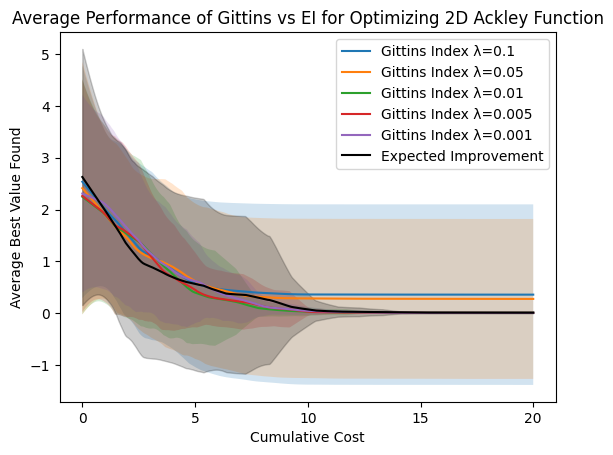

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

common_cost_points = np.linspace(0, budget, num=500)

# Prepare lists for storing interpolated results
EI_interpolated_values = []
GI_interpolated_values = {lmbda: [] for lmbda in lmbda_values}

# Interpolate and average for EI
for best_history, cost_history in zip(EI_best_histories, EI_cost_histories):
    ei_interp_func = interp1d(cost_history, best_history, kind='linear', bounds_error=False, fill_value="extrapolate")
    ei_interpolated = ei_interp_func(common_cost_points)
    EI_interpolated_values.append(ei_interpolated)

# Function to calculate average and standard deviation
def calculate_avg_and_std(histories):
    # Convert list of lists to numpy array for easier calculations
    histories_array = np.array(histories)
    avg_performance = np.mean(histories_array, axis=0)
    std_performance = np.std(histories_array, axis=0)
    return avg_performance, std_performance

# Calculate average and standard deviation for EI
EI_avg_performance, EI_std_performance = calculate_avg_and_std(EI_best_histories)

# Interpolate and average for each lmbda in GI
for lmbda in lmbda_values:
    for best_history, cost_history in zip(GI_best_histories[lmbda], GI_cost_histories[lmbda]):
        gi_interp_func = interp1d(cost_history, best_history, kind='linear', bounds_error=False, fill_value="extrapolate")
        gi_interpolated = gi_interp_func(common_cost_points)
        GI_interpolated_values[lmbda].append(gi_interpolated)

    GI_avg_performance, GI_std_performance = calculate_avg_and_std(GI_best_histories[lmbda])

    # Plotting for each lmbda
    plt.plot(common_cost_points, GI_avg_performance, label=f'Gittins Index λ={lmbda}')
    plt.fill_between(common_cost_points, GI_avg_performance - 1.96 * GI_std_performance, GI_avg_performance + 1.96 * GI_std_performance, alpha=0.2)

# Plotting for EI
plt.plot(common_cost_points, EI_avg_performance, label='Expected Improvement', color='black')
plt.fill_between(common_cost_points, EI_avg_performance - 1.96 * EI_std_performance, EI_avg_performance + 1.96 * EI_std_performance, color='black', alpha=0.2)

# Set x-axis ticks
plt.xticks([0, 5, 10, 15, 20])
plt.xlabel('Cumulative Cost')
plt.ylabel('Average Best Value Found')
plt.title("Average Performance of Gittins vs EI for Optimizing 2D Ackley Function")
plt.legend()
plt.show()

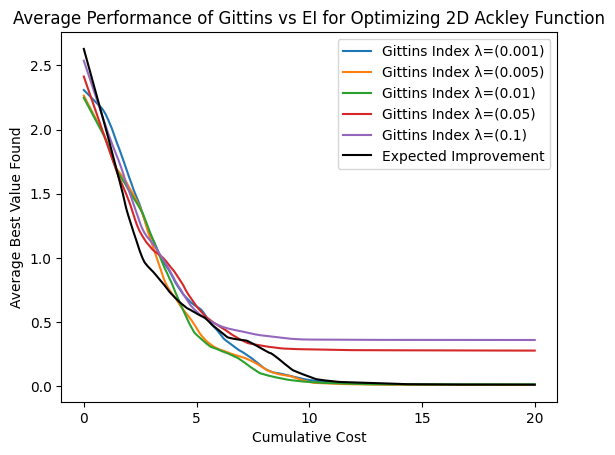

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Interpolate and average for each lmbda in GI
for lmbda in lmbda_values:

    GI_avg_performance = np.mean(GI_interpolated_values[lmbda], axis=0)

    # Plotting for each lmbda
    plt.plot(common_cost_points, GI_avg_performance, label=f'Gittins Index λ=({lmbda})')

# Plotting for EI
plt.plot(common_cost_points, EI_avg_performance, label='Expected Improvement', color='black')

# Set x-axis ticks
plt.xticks([0, 5, 10, 15, 20])
plt.xlabel('Cumulative Cost')
plt.ylabel('Average Best Value Found')
plt.title("Average Performance of Gittins vs EI for Optimizing 2D Ackley Function")
plt.legend()
plt.show()

In [250]:
import json

# Open a file and write the string to it
with open('EI best (Ackley2D).txt', 'w') as file:
    file.write(json.dumps(EI_best_histories, indent=4))

with open('EI cost (Ackley2D).txt', 'w') as file:
    file.write(json.dumps(EI_cost_histories, indent=4))

In [251]:
# Open a file and write the string to it
with open('GI best (Ackley2D).txt', 'w') as file:
    file.write(json.dumps(GI_best_histories, indent=4))

with open('GI cost (Ackley2D).txt', 'w') as file:
    file.write(json.dumps(GI_cost_histories, indent=4))